In [1]:
%pylab inline 


Populating the interactive namespace from numpy and matplotlib


In [2]:
import gym
from gym import error, spaces, utils
from gym.utils import seeding
from collections import Counter
import time
import progressbar as pb
from tqdm import tqdm
import os
import shutil
from empyrical import sortino_ratio, calmar_ratio, omega_ratio
from stable_baselines.common.policies import MlpPolicy, MlpLstmPolicy, ActorCriticPolicy, FeedForwardPolicy
from stable_baselines.common.vec_env import SubprocVecEnv, VecEnv, VecEnvWrapper
from stable_baselines import A2C, PPO2
from stable_baselines.common.vec_env import DummyVecEnv
import tensorflow as tf
from trading_env import TradingEnv

In [3]:
# load the market data
input_source = np.load(open('data_dummy.npy','rb'))
to_predict = np.load(open('data_dummy_targets.npy','rb'))

to_predict = to_predict[3,:].reshape(-1)

input_source = input_source.T

In [4]:
is_orig = np.copy(input_source)
cp = int(0.8*len(input_source))
test_input_source = input_source[cp:, :]
test_to_predict = to_predict[cp:]
input_source = input_source[0:cp, :]
to_predict = to_predict[0:cp]

In [5]:
bars_per_episode = 1000
winlen = 1
traded_amt = 1
initial_balance = 10000
commission = 0
slippage = 0.0

In [6]:
# multiprocess environment
#n_cpu = 16
#env = SubprocVecEnv([lambda: TradingEnv() for i in range(n_cpu)])
env = TradingEnv(input_source, to_predict,
                 winlen=winlen, bars_per_episode=bars_per_episode, traded_amt=traded_amt, initial_balance=initial_balance,
                 commission=commission, slippage=slippage
                 )
env = DummyVecEnv([lambda: env])

t = 0
# Custom MLP policy of two layers of size 32 each with tanh activation function
policy_kwargs = dict(act_fun=tf.nn.relu, net_arch=[8, 8])

#[shutil.rmtree('/home/peter/tblog/'+x) for x in os.listdir('/home/peter/tblog/') if x]
model = PPO2(MlpPolicy, env, verbose=1, policy_kwargs=policy_kwargs, tensorboard_log='/home/peter/tblog')
try:
    model.learn(total_timesteps=1_000_000)
    model.save("ppo2_trading")
except KeyboardInterrupt:
    pass

W0706 06:06:44.240294 140315383371584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/tf_util.py:98: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0706 06:06:44.241096 140315383371584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/tf_util.py:107: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0706 06:06:44.250297 140315383371584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/policies.py:114: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0706 06:06:44.251090 140315383371584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/stable_baselines/common/input.py:25: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 06:06:44.252765 140315383371584 deprecation.py:323] From /u

-------------------------------------
| approxkl           | 0.0012821438 |
| clipfrac           | 0.0          |
| explained_variance | -0.028       |
| fps                | 483          |
| n_updates          | 1            |
| policy_entropy     | 1.3826143    |
| policy_loss        | -0.006984351 |
| serial_timesteps   | 128          |
| time_elapsed       | 8.34e-06     |
| total_timesteps    | 128          |
| value_loss         | 13476.777    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0006505665  |
| clipfrac           | 0.0           |
| explained_variance | -0.0198       |
| fps                | 1999          |
| n_updates          | 2             |
| policy_entropy     | 1.3777714     |
| policy_loss        | -0.0056472104 |
| serial_timesteps   | 256           |
| time_elapsed       | 0.265         |
| total_timesteps    | 256           |
| value_loss         | 25390.676     |
--------------------------------------

--------------------------------------
| approxkl           | 0.00041565497 |
| clipfrac           | 0.0           |
| explained_variance | 0.0062        |
| fps                | 2311          |
| n_updates          | 18            |
| policy_entropy     | 1.3511589     |
| policy_loss        | -0.00624804   |
| serial_timesteps   | 2304          |
| time_elapsed       | 1.23          |
| total_timesteps    | 2304          |
| value_loss         | 6210.9097     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00021574023 |
| clipfrac           | 0.0           |
| explained_variance | -0.0677       |
| fps                | 2239          |
| n_updates          | 19            |
| policy_entropy     | 1.3494519     |
| policy_loss        | 0.0006529655  |
| serial_timesteps   | 2432          |
| time_elapsed       | 1.29          |
| total_timesteps    | 2432          |
| value_loss         | 5438.2285     |
-------------------------

---------------------------------------
| approxkl           | 0.000115005976 |
| clipfrac           | 0.0            |
| explained_variance | -0.021         |
| fps                | 1983           |
| n_updates          | 35             |
| policy_entropy     | 1.2037232      |
| policy_loss        | -0.0011471794  |
| serial_timesteps   | 4480           |
| time_elapsed       | 2.22           |
| total_timesteps    | 4480           |
| value_loss         | 163940.67      |
---------------------------------------
---------------------------------------
| approxkl           | 2.8184675e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.0148         |
| fps                | 2176           |
| n_updates          | 36             |
| policy_entropy     | 1.1877633      |
| policy_loss        | -2.7478207e-05 |
| serial_timesteps   | 4608           |
| time_elapsed       | 2.28           |
| total_timesteps    | 4608           |
| value_loss         | 48088.71       |


----------------------------------------
| approxkl           | 1.5276799e-05   |
| clipfrac           | 0.0             |
| explained_variance | 0.0348          |
| fps                | 2320            |
| n_updates          | 52              |
| policy_entropy     | 1.1914866       |
| policy_loss        | -1.48348045e-05 |
| serial_timesteps   | 6656            |
| time_elapsed       | 3.4             |
| total_timesteps    | 6656            |
| value_loss         | 68191.26        |
----------------------------------------
---------------------------------------
| approxkl           | 0.000106621075 |
| clipfrac           | 0.0            |
| explained_variance | 0.0197         |
| fps                | 2312           |
| n_updates          | 53             |
| policy_entropy     | 1.1978906      |
| policy_loss        | -0.0015839502  |
| serial_timesteps   | 6784           |
| time_elapsed       | 3.45           |
| total_timesteps    | 6784           |
| value_loss         | 1053

---------------------------------------
| approxkl           | 5.4249085e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.00428       |
| fps                | 2172           |
| n_updates          | 68             |
| policy_entropy     | 1.1766939      |
| policy_loss        | -0.00091483525 |
| serial_timesteps   | 8704           |
| time_elapsed       | 4.31           |
| total_timesteps    | 8704           |
| value_loss         | 73869.05       |
---------------------------------------
--------------------------------------
| approxkl           | 2.6281106e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0122        |
| fps                | 2300          |
| n_updates          | 69            |
| policy_entropy     | 1.1644655     |
| policy_loss        | 0.0010797267  |
| serial_timesteps   | 8832          |
| time_elapsed       | 4.37          |
| total_timesteps    | 8832          |
| value_loss         | 263586.0      |
------------

-------------------------------------
| approxkl           | 0.0006562785 |
| clipfrac           | 0.0          |
| explained_variance | -0.00766     |
| fps                | 2327         |
| n_updates          | 85           |
| policy_entropy     | 1.1939814    |
| policy_loss        | 0.0008738005 |
| serial_timesteps   | 10880        |
| time_elapsed       | 5.36         |
| total_timesteps    | 10880        |
| value_loss         | 121045.734   |
-------------------------------------
--------------------------------------
| approxkl           | 4.2546704e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0163        |
| fps                | 2294          |
| n_updates          | 86            |
| policy_entropy     | 1.1792834     |
| policy_loss        | 9.37772e-06   |
| serial_timesteps   | 11008         |
| time_elapsed       | 5.41          |
| total_timesteps    | 11008         |
| value_loss         | 112997.22     |
--------------------------------------

--------------------------------------
| approxkl           | 9.3022725e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.00235      |
| fps                | 2196          |
| n_updates          | 102           |
| policy_entropy     | 1.195602      |
| policy_loss        | -8.790183e-05 |
| serial_timesteps   | 13056         |
| time_elapsed       | 6.31          |
| total_timesteps    | 13056         |
| value_loss         | 173597.1      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00010918475 |
| clipfrac           | 0.0           |
| explained_variance | 0.0454        |
| fps                | 2333          |
| n_updates          | 103           |
| policy_entropy     | 1.1946887     |
| policy_loss        | 9.001326e-05  |
| serial_timesteps   | 13184         |
| time_elapsed       | 6.37          |
| total_timesteps    | 13184         |
| value_loss         | 53713.316     |
-------------------------

-------------------------------------
| approxkl           | 6.74678e-05  |
| clipfrac           | 0.0          |
| explained_variance | 0.0139       |
| fps                | 2467         |
| n_updates          | 119          |
| policy_entropy     | 1.2022896    |
| policy_loss        | 0.0009281117 |
| serial_timesteps   | 15232        |
| time_elapsed       | 7.27         |
| total_timesteps    | 15232        |
| value_loss         | 369254.62    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00020639665 |
| clipfrac           | 0.0           |
| explained_variance | 0.0707        |
| fps                | 2449          |
| n_updates          | 120           |
| policy_entropy     | 1.1943766     |
| policy_loss        | -0.0010593825 |
| serial_timesteps   | 15360         |
| time_elapsed       | 7.32          |
| total_timesteps    | 15360         |
| value_loss         | 75400.35      |
--------------------------------------

--------------------------------------
| approxkl           | 0.00063608703 |
| clipfrac           | 0.009765625   |
| explained_variance | -0.00854      |
| fps                | 2265          |
| n_updates          | 136           |
| policy_entropy     | 1.1253719     |
| policy_loss        | -0.003259157  |
| serial_timesteps   | 17408         |
| time_elapsed       | 8.26          |
| total_timesteps    | 17408         |
| value_loss         | 134724.48     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00054452906 |
| clipfrac           | 0.0           |
| explained_variance | -0.00598      |
| fps                | 2105          |
| n_updates          | 137           |
| policy_entropy     | 1.1406718     |
| policy_loss        | 0.00018436834 |
| serial_timesteps   | 17536         |
| time_elapsed       | 8.32          |
| total_timesteps    | 17536         |
| value_loss         | 110779.44     |
-------------------------

--------------------------------------
| approxkl           | 4.8481226e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.00172      |
| fps                | 2124          |
| n_updates          | 153           |
| policy_entropy     | 1.0987129     |
| policy_loss        | 0.0007201077  |
| serial_timesteps   | 19584         |
| time_elapsed       | 9.27          |
| total_timesteps    | 19584         |
| value_loss         | 350296.1      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00012424246 |
| clipfrac           | 0.0           |
| explained_variance | 0.0119        |
| fps                | 2312          |
| n_updates          | 154           |
| policy_entropy     | 1.0964996     |
| policy_loss        | -0.0011325505 |
| serial_timesteps   | 19712         |
| time_elapsed       | 9.33          |
| total_timesteps    | 19712         |
| value_loss         | 205496.03     |
-------------------------

--------------------------------------
| approxkl           | 5.7044916e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0136        |
| fps                | 2353          |
| n_updates          | 170           |
| policy_entropy     | 1.0422921     |
| policy_loss        | -0.0008036805 |
| serial_timesteps   | 21760         |
| time_elapsed       | 10.2          |
| total_timesteps    | 21760         |
| value_loss         | 170569.84     |
--------------------------------------
---------------------------------------
| approxkl           | 9.379082e-05   |
| clipfrac           | 0.0            |
| explained_variance | -0.00188       |
| fps                | 2617           |
| n_updates          | 171            |
| policy_entropy     | 1.0433888      |
| policy_loss        | -0.00092381483 |
| serial_timesteps   | 21888          |
| time_elapsed       | 10.3           |
| total_timesteps    | 21888          |
| value_loss         | 155469.39      |
-------------

---------------------------------------
| approxkl           | 1.1235688e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.108          |
| fps                | 2399           |
| n_updates          | 186            |
| policy_entropy     | 0.93329513     |
| policy_loss        | -0.00021028228 |
| serial_timesteps   | 23808          |
| time_elapsed       | 11.1           |
| total_timesteps    | 23808          |
| value_loss         | 263903.47      |
---------------------------------------
--------------------------------------
| approxkl           | 7.876135e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.00417       |
| fps                | 2434          |
| n_updates          | 187           |
| policy_entropy     | 0.93165386    |
| policy_loss        | -0.0009320874 |
| serial_timesteps   | 23936         |
| time_elapsed       | 11.1          |
| total_timesteps    | 23936         |
| value_loss         | 200128.14     |
------------

--------------------------------------
| approxkl           | 0.0001007957  |
| clipfrac           | 0.0           |
| explained_variance | -0.00164      |
| fps                | 2136          |
| n_updates          | 203           |
| policy_entropy     | 0.84532166    |
| policy_loss        | 0.00010236632 |
| serial_timesteps   | 25984         |
| time_elapsed       | 12.1          |
| total_timesteps    | 25984         |
| value_loss         | 152927.19     |
--------------------------------------
--------------------------------------
| approxkl           | 3.1124095e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0101        |
| fps                | 2240          |
| n_updates          | 204           |
| policy_entropy     | 0.9075651     |
| policy_loss        | 0.00012238615 |
| serial_timesteps   | 26112         |
| time_elapsed       | 12.1          |
| total_timesteps    | 26112         |
| value_loss         | 121894.38     |
-------------------------

-------------------------------------
| approxkl           | 9.633628e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0.112        |
| fps                | 2297         |
| n_updates          | 220          |
| policy_entropy     | 0.8413087    |
| policy_loss        | 0.0012673099 |
| serial_timesteps   | 28160        |
| time_elapsed       | 13           |
| total_timesteps    | 28160        |
| value_loss         | 381952.2     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0007326421  |
| clipfrac           | 0.0           |
| explained_variance | 0.0433        |
| fps                | 2316          |
| n_updates          | 221           |
| policy_entropy     | 0.83519477    |
| policy_loss        | -0.0022501852 |
| serial_timesteps   | 28288         |
| time_elapsed       | 13.1          |
| total_timesteps    | 28288         |
| value_loss         | 201696.38     |
--------------------------------------

--------------------------------------
| approxkl           | 0.00037999052 |
| clipfrac           | 0.0           |
| explained_variance | 0.00425       |
| fps                | 2318          |
| n_updates          | 237           |
| policy_entropy     | 0.74851       |
| policy_loss        | -0.0036323895 |
| serial_timesteps   | 30336         |
| time_elapsed       | 14            |
| total_timesteps    | 30336         |
| value_loss         | 254788.03     |
--------------------------------------
-------------------------------------
| approxkl           | 1.439047e-05 |
| clipfrac           | 0.0          |
| explained_variance | -0.00176     |
| fps                | 2275         |
| n_updates          | 238          |
| policy_entropy     | 0.7464441    |
| policy_loss        | 0.0004850548 |
| serial_timesteps   | 30464        |
| time_elapsed       | 14.1         |
| total_timesteps    | 30464        |
| value_loss         | 370036.75    |
-------------------------------------

---------------------------------------
| approxkl           | 8.2825136e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.0162         |
| fps                | 2245           |
| n_updates          | 254            |
| policy_entropy     | 0.7448885      |
| policy_loss        | -0.00096960616 |
| serial_timesteps   | 32512          |
| time_elapsed       | 15             |
| total_timesteps    | 32512          |
| value_loss         | 223810.0       |
---------------------------------------
---------------------------------------
| approxkl           | 5.163511e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.0242         |
| fps                | 2210           |
| n_updates          | 255            |
| policy_entropy     | 0.74531263     |
| policy_loss        | -0.00014080986 |
| serial_timesteps   | 32640          |
| time_elapsed       | 15.1           |
| total_timesteps    | 32640          |
| value_loss         | 299343.62      |


--------------------------------------
| approxkl           | 0.00017509644 |
| clipfrac           | 0.0           |
| explained_variance | 0.00405       |
| fps                | 2295          |
| n_updates          | 271           |
| policy_entropy     | 0.7164947     |
| policy_loss        | -0.0010201482 |
| serial_timesteps   | 34688         |
| time_elapsed       | 16            |
| total_timesteps    | 34688         |
| value_loss         | 362862.94     |
--------------------------------------
--------------------------------------
| approxkl           | 3.786895e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.0189        |
| fps                | 2327          |
| n_updates          | 272           |
| policy_entropy     | 0.715948      |
| policy_loss        | 0.00022920605 |
| serial_timesteps   | 34816         |
| time_elapsed       | 16.1          |
| total_timesteps    | 34816         |
| value_loss         | 164537.94     |
-------------------------

-------------------------------------
| approxkl           | 8.556092e-06 |
| clipfrac           | 0.0          |
| explained_variance | 0.121        |
| fps                | 2461         |
| n_updates          | 288          |
| policy_entropy     | 0.6794736    |
| policy_loss        | 7.89226e-05  |
| serial_timesteps   | 36864        |
| time_elapsed       | 17           |
| total_timesteps    | 36864        |
| value_loss         | 360708.22    |
-------------------------------------
--------------------------------------
| approxkl           | 8.9088564e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0577        |
| fps                | 2430          |
| n_updates          | 289           |
| policy_entropy     | 0.65879697    |
| policy_loss        | -0.0009018023 |
| serial_timesteps   | 36992         |
| time_elapsed       | 17            |
| total_timesteps    | 36992         |
| value_loss         | 247588.78     |
--------------------------------------

---------------------------------------
| approxkl           | 1.0582621e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.11           |
| fps                | 2389           |
| n_updates          | 305            |
| policy_entropy     | 0.57564133     |
| policy_loss        | -0.00029958005 |
| serial_timesteps   | 39040          |
| time_elapsed       | 17.9           |
| total_timesteps    | 39040          |
| value_loss         | 377724.75      |
---------------------------------------
---------------------------------------
| approxkl           | 0.00011075038  |
| clipfrac           | 0.0            |
| explained_variance | -0.21          |
| fps                | 2412           |
| n_updates          | 306            |
| policy_entropy     | 0.55964935     |
| policy_loss        | -0.00010633003 |
| serial_timesteps   | 39168          |
| time_elapsed       | 17.9           |
| total_timesteps    | 39168          |
| value_loss         | 502108.62      |


--------------------------------------
| approxkl           | 2.5588368e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0732        |
| fps                | 2435          |
| n_updates          | 322           |
| policy_entropy     | 0.4817001     |
| policy_loss        | -0.0009341728 |
| serial_timesteps   | 41216         |
| time_elapsed       | 18.8          |
| total_timesteps    | 41216         |
| value_loss         | 270315.97     |
--------------------------------------
--------------------------------------
| approxkl           | 1.709613e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.00657      |
| fps                | 2464          |
| n_updates          | 323           |
| policy_entropy     | 0.47015822    |
| policy_loss        | 0.00035543786 |
| serial_timesteps   | 41344         |
| time_elapsed       | 18.9          |
| total_timesteps    | 41344         |
| value_loss         | 417595.5      |
-------------------------

---------------------------------------
| approxkl           | 0.00024246269  |
| clipfrac           | 0.001953125    |
| explained_variance | 0.134          |
| fps                | 2518           |
| n_updates          | 339            |
| policy_entropy     | 0.46108276     |
| policy_loss        | -2.4902401e-06 |
| serial_timesteps   | 43392          |
| time_elapsed       | 19.7           |
| total_timesteps    | 43392          |
| value_loss         | 501738.53      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0012492214 |
| clipfrac           | 0.009765625  |
| explained_variance | -0.104       |
| fps                | 2499         |
| n_updates          | 340          |
| policy_entropy     | 0.43993837   |
| policy_loss        | -0.004839385 |
| serial_timesteps   | 43520        |
| time_elapsed       | 19.8         |
| total_timesteps    | 43520        |
| value_loss         | 341324.72    |
------------------------

--------------------------------------
| approxkl           | 4.9781193e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.0408       |
| fps                | 2395          |
| n_updates          | 356           |
| policy_entropy     | 0.55058414    |
| policy_loss        | -9.898911e-05 |
| serial_timesteps   | 45568         |
| time_elapsed       | 20.7          |
| total_timesteps    | 45568         |
| value_loss         | 549504.1      |
--------------------------------------
---------------------------------------
| approxkl           | 3.365162e-05   |
| clipfrac           | 0.0            |
| explained_variance | -0.113         |
| fps                | 2404           |
| n_updates          | 357            |
| policy_entropy     | 0.5493441      |
| policy_loss        | -0.00062943995 |
| serial_timesteps   | 45696          |
| time_elapsed       | 20.7           |
| total_timesteps    | 45696          |
| value_loss         | 174681.33      |
-------------

---------------------------------------
| approxkl           | 7.186011e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.0359        |
| fps                | 1629           |
| n_updates          | 373            |
| policy_entropy     | 0.5210545      |
| policy_loss        | -2.8482871e-05 |
| serial_timesteps   | 47744          |
| time_elapsed       | 21.7           |
| total_timesteps    | 47744          |
| value_loss         | 285540.94      |
---------------------------------------
---------------------------------------
| approxkl           | 1.3674981e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00975        |
| fps                | 1840           |
| n_updates          | 374            |
| policy_entropy     | 0.5231264      |
| policy_loss        | -0.00063479773 |
| serial_timesteps   | 47872          |
| time_elapsed       | 21.8           |
| total_timesteps    | 47872          |
| value_loss         | 300473.5       |


--------------------------------------
| approxkl           | 0.00013891292 |
| clipfrac           | 0.0           |
| explained_variance | -0.0349       |
| fps                | 1869          |
| n_updates          | 390           |
| policy_entropy     | 0.5399175     |
| policy_loss        | 0.00014159549 |
| serial_timesteps   | 49920         |
| time_elapsed       | 22.9          |
| total_timesteps    | 49920         |
| value_loss         | 283992.62     |
--------------------------------------
--------------------------------------
| approxkl           | 2.0674266e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0465       |
| fps                | 1920          |
| n_updates          | 391           |
| policy_entropy     | 0.5386933     |
| policy_loss        | 0.00014185673 |
| serial_timesteps   | 50048         |
| time_elapsed       | 23            |
| total_timesteps    | 50048         |
| value_loss         | 399930.25     |
-------------------------

-------------------------------------
| approxkl           | 0.0038487837 |
| clipfrac           | 0.04296875   |
| explained_variance | -0.134       |
| fps                | 2231         |
| n_updates          | 407          |
| policy_entropy     | 0.46096453   |
| policy_loss        | 0.008334978  |
| serial_timesteps   | 52096        |
| time_elapsed       | 24.1         |
| total_timesteps    | 52096        |
| value_loss         | 744598.94    |
-------------------------------------
------------------------------------
| approxkl           | 0.015442418 |
| clipfrac           | 0.16992188  |
| explained_variance | -0.0519     |
| fps                | 2284        |
| n_updates          | 408         |
| policy_entropy     | 0.520034    |
| policy_loss        | 0.006507852 |
| serial_timesteps   | 52224       |
| time_elapsed       | 24.1        |
| total_timesteps    | 52224       |
| value_loss         | 570093.2    |
------------------------------------
-------------------------

-------------------------------------
| approxkl           | 0.00652713   |
| clipfrac           | 0.083984375  |
| explained_variance | -0.195       |
| fps                | 2213         |
| n_updates          | 424          |
| policy_entropy     | 0.4982849    |
| policy_loss        | -0.008307097 |
| serial_timesteps   | 54272        |
| time_elapsed       | 25           |
| total_timesteps    | 54272        |
| value_loss         | 378017.9     |
-------------------------------------
------------------------------------
| approxkl           | 0.014599334 |
| clipfrac           | 0.2265625   |
| explained_variance | 0.0189      |
| fps                | 2294        |
| n_updates          | 425         |
| policy_entropy     | 0.52502227  |
| policy_loss        | 0.026258001 |
| serial_timesteps   | 54400       |
| time_elapsed       | 25.1        |
| total_timesteps    | 54400       |
| value_loss         | 505887.66   |
------------------------------------
-------------------------

---------------------------------------
| approxkl           | 1.34233305e-05 |
| clipfrac           | 0.0            |
| explained_variance | -0.0515        |
| fps                | 2212           |
| n_updates          | 441            |
| policy_entropy     | 0.53147125     |
| policy_loss        | -0.00043626188 |
| serial_timesteps   | 56448          |
| time_elapsed       | 26.1           |
| total_timesteps    | 56448          |
| value_loss         | 317926.4       |
---------------------------------------
--------------------------------------
| approxkl           | 6.5073687e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.161        |
| fps                | 2247          |
| n_updates          | 442           |
| policy_entropy     | 0.52889585    |
| policy_loss        | 0.0002492062  |
| serial_timesteps   | 56576         |
| time_elapsed       | 26.2          |
| total_timesteps    | 56576         |
| value_loss         | 269988.06     |
------------

-------------------------------------
| approxkl           | 0.009253481  |
| clipfrac           | 0.0859375    |
| explained_variance | -0.0613      |
| fps                | 2261         |
| n_updates          | 458          |
| policy_entropy     | 0.4981179    |
| policy_loss        | -0.005776419 |
| serial_timesteps   | 58624        |
| time_elapsed       | 27.1         |
| total_timesteps    | 58624        |
| value_loss         | 434373.22    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00020315807 |
| clipfrac           | 0.0           |
| explained_variance | -0.0316       |
| fps                | 2261          |
| n_updates          | 459           |
| policy_entropy     | 0.52259123    |
| policy_loss        | 0.0010146225  |
| serial_timesteps   | 58752         |
| time_elapsed       | 27.1          |
| total_timesteps    | 58752         |
| value_loss         | 347014.56     |
--------------------------------------

-------------------------------------
| approxkl           | 0.013284991  |
| clipfrac           | 0.09765625   |
| explained_variance | -0.0836      |
| fps                | 2048         |
| n_updates          | 475          |
| policy_entropy     | 0.5964605    |
| policy_loss        | 0.0010879119 |
| serial_timesteps   | 60800        |
| time_elapsed       | 28.1         |
| total_timesteps    | 60800        |
| value_loss         | 690260.94    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0005821495  |
| clipfrac           | 0.0           |
| explained_variance | -0.0439       |
| fps                | 2036          |
| n_updates          | 476           |
| policy_entropy     | 0.6183833     |
| policy_loss        | -0.0013815311 |
| serial_timesteps   | 60928         |
| time_elapsed       | 28.1          |
| total_timesteps    | 60928         |
| value_loss         | 219104.44     |
--------------------------------------

---------------------------------------
| approxkl           | 0.00035687513  |
| clipfrac           | 0.0            |
| explained_variance | -0.189         |
| fps                | 1710           |
| n_updates          | 492            |
| policy_entropy     | 0.51285434     |
| policy_loss        | -4.2822503e-05 |
| serial_timesteps   | 62976          |
| time_elapsed       | 29.3           |
| total_timesteps    | 62976          |
| value_loss         | 265137.16      |
---------------------------------------
-------------------------------------
| approxkl           | 0.007451411  |
| clipfrac           | 0.103515625  |
| explained_variance | -0.221       |
| fps                | 1752         |
| n_updates          | 493          |
| policy_entropy     | 0.4948099    |
| policy_loss        | 0.0070698923 |
| serial_timesteps   | 63104        |
| time_elapsed       | 29.4         |
| total_timesteps    | 63104        |
| value_loss         | 264932.12    |
------------------------

--------------------------------------
| approxkl           | 5.5072618e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.229        |
| fps                | 2331          |
| n_updates          | 509           |
| policy_entropy     | 0.50778836    |
| policy_loss        | 0.00032231188 |
| serial_timesteps   | 65152         |
| time_elapsed       | 30.4          |
| total_timesteps    | 65152         |
| value_loss         | 212226.8      |
--------------------------------------
--------------------------------------
| approxkl           | 0.002493043   |
| clipfrac           | 0.0234375     |
| explained_variance | -0.295        |
| fps                | 2173          |
| n_updates          | 510           |
| policy_entropy     | 0.5085965     |
| policy_loss        | -0.0013540264 |
| serial_timesteps   | 65280         |
| time_elapsed       | 30.4          |
| total_timesteps    | 65280         |
| value_loss         | 171607.17     |
-------------------------

-------------------------------------
| approxkl           | 0.0076463837 |
| clipfrac           | 0.107421875  |
| explained_variance | -0.0728      |
| fps                | 2226         |
| n_updates          | 526          |
| policy_entropy     | 0.46395785   |
| policy_loss        | 0.0002895624 |
| serial_timesteps   | 67328        |
| time_elapsed       | 31.3         |
| total_timesteps    | 67328        |
| value_loss         | 443733.2     |
-------------------------------------
------------------------------------
| approxkl           | 0.02103063  |
| clipfrac           | 0.25976562  |
| explained_variance | 0.00621     |
| fps                | 2260        |
| n_updates          | 527         |
| policy_entropy     | 0.46923238  |
| policy_loss        | 0.064031556 |
| serial_timesteps   | 67456       |
| time_elapsed       | 31.4        |
| total_timesteps    | 67456       |
| value_loss         | 368258.28   |
------------------------------------
-------------------------

--------------------------------------
| approxkl           | 0.0002585178  |
| clipfrac           | 0.001953125   |
| explained_variance | -0.248        |
| fps                | 2187          |
| n_updates          | 543           |
| policy_entropy     | 0.34417045    |
| policy_loss        | 0.00034402742 |
| serial_timesteps   | 69504         |
| time_elapsed       | 32.3          |
| total_timesteps    | 69504         |
| value_loss         | 283803.44     |
--------------------------------------
--------------------------------------
| approxkl           | 3.1325415e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.0455       |
| fps                | 2200          |
| n_updates          | 544           |
| policy_entropy     | 0.35202885    |
| policy_loss        | 0.00034058245 |
| serial_timesteps   | 69632         |
| time_elapsed       | 32.4          |
| total_timesteps    | 69632         |
| value_loss         | 321842.94     |
-------------------------

-------------------------------------
| approxkl           | 0.0057965536 |
| clipfrac           | 0.046875     |
| explained_variance | -0.154       |
| fps                | 2274         |
| n_updates          | 560          |
| policy_entropy     | 0.2749906    |
| policy_loss        | 0.0107933795 |
| serial_timesteps   | 71680        |
| time_elapsed       | 33.3         |
| total_timesteps    | 71680        |
| value_loss         | 132472.52    |
-------------------------------------
---------------------------------------
| approxkl           | 0.00017506882  |
| clipfrac           | 0.0            |
| explained_variance | -0.005         |
| fps                | 2296           |
| n_updates          | 561            |
| policy_entropy     | 0.288545       |
| policy_loss        | 0.000102344435 |
| serial_timesteps   | 71808          |
| time_elapsed       | 33.3           |
| total_timesteps    | 71808          |
| value_loss         | 306636.03      |
--------------------------

---------------------------------------
| approxkl           | 5.0016715e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.108          |
| fps                | 2181           |
| n_updates          | 577            |
| policy_entropy     | 0.21292104     |
| policy_loss        | -8.6336746e-05 |
| serial_timesteps   | 73856          |
| time_elapsed       | 34.3           |
| total_timesteps    | 73856          |
| value_loss         | 140670.03      |
---------------------------------------
--------------------------------------
| approxkl           | 2.3833605e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0935        |
| fps                | 2258          |
| n_updates          | 578           |
| policy_entropy     | 0.21272914    |
| policy_loss        | 0.00059097435 |
| serial_timesteps   | 73984         |
| time_elapsed       | 34.4          |
| total_timesteps    | 73984         |
| value_loss         | 139041.08     |
------------

-------------------------------------
| approxkl           | 0.0009099048 |
| clipfrac           | 0.009765625  |
| explained_variance | -0.25        |
| fps                | 1992         |
| n_updates          | 594          |
| policy_entropy     | 0.22375965   |
| policy_loss        | 0.002714481  |
| serial_timesteps   | 76032        |
| time_elapsed       | 35.5         |
| total_timesteps    | 76032        |
| value_loss         | 746173.9     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0009757191 |
| clipfrac           | 0.0078125    |
| explained_variance | -0.0431      |
| fps                | 1879         |
| n_updates          | 595          |
| policy_entropy     | 0.32202      |
| policy_loss        | 0.0002974735 |
| serial_timesteps   | 76160        |
| time_elapsed       | 35.5         |
| total_timesteps    | 76160        |
| value_loss         | 312480.03    |
-------------------------------------
------------

--------------------------------------
| approxkl           | 3.9558996e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.316        |
| fps                | 2073          |
| n_updates          | 611           |
| policy_entropy     | 0.24100918    |
| policy_loss        | -0.0002940013 |
| serial_timesteps   | 78208         |
| time_elapsed       | 36.8          |
| total_timesteps    | 78208         |
| value_loss         | 173853.44     |
--------------------------------------
--------------------------------------
| approxkl           | 5.3092077e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.225        |
| fps                | 2085          |
| n_updates          | 612           |
| policy_entropy     | 0.2423423     |
| policy_loss        | 0.0011578535  |
| serial_timesteps   | 78336         |
| time_elapsed       | 36.8          |
| total_timesteps    | 78336         |
| value_loss         | 487384.25     |
-------------------------

-------------------------------------
| approxkl           | 0.004674154  |
| clipfrac           | 0.07421875   |
| explained_variance | -0.331       |
| fps                | 1871         |
| n_updates          | 628          |
| policy_entropy     | 0.38811213   |
| policy_loss        | -0.012355309 |
| serial_timesteps   | 80384        |
| time_elapsed       | 37.9         |
| total_timesteps    | 80384        |
| value_loss         | 390390.53    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0031989894  |
| clipfrac           | 0.03125       |
| explained_variance | -0.224        |
| fps                | 1866          |
| n_updates          | 629           |
| policy_entropy     | 0.38177282    |
| policy_loss        | -0.0051140804 |
| serial_timesteps   | 80512         |
| time_elapsed       | 38            |
| total_timesteps    | 80512         |
| value_loss         | 375628.53     |
--------------------------------------

------------------------------------
| approxkl           | 0.009314454 |
| clipfrac           | 0.140625    |
| explained_variance | 0.00779     |
| fps                | 1856        |
| n_updates          | 645         |
| policy_entropy     | 0.34362984  |
| policy_loss        | 0.014257518 |
| serial_timesteps   | 82560       |
| time_elapsed       | 39.1        |
| total_timesteps    | 82560       |
| value_loss         | 425401.88   |
------------------------------------
------------------------------------
| approxkl           | 0.030618602 |
| clipfrac           | 0.30078125  |
| explained_variance | -0.0295     |
| fps                | 1824        |
| n_updates          | 646         |
| policy_entropy     | 0.36053443  |
| policy_loss        | 0.024730831 |
| serial_timesteps   | 82688       |
| time_elapsed       | 39.2        |
| total_timesteps    | 82688       |
| value_loss         | 427927.62   |
------------------------------------
------------------------------------
|

--------------------------------------
| approxkl           | 0.00027423672 |
| clipfrac           | 0.0           |
| explained_variance | -0.331        |
| fps                | 2142          |
| n_updates          | 662           |
| policy_entropy     | 0.30695838    |
| policy_loss        | 0.0015134707  |
| serial_timesteps   | 84736         |
| time_elapsed       | 40.3          |
| total_timesteps    | 84736         |
| value_loss         | 474393.47     |
--------------------------------------
-------------------------------------
| approxkl           | 0.009257867  |
| clipfrac           | 0.15820312   |
| explained_variance | -0.335       |
| fps                | 2147         |
| n_updates          | 663          |
| policy_entropy     | 0.36423603   |
| policy_loss        | -0.009521209 |
| serial_timesteps   | 84864        |
| time_elapsed       | 40.3         |
| total_timesteps    | 84864        |
| value_loss         | 470331.97    |
-------------------------------------

-------------------------------------
| approxkl           | 0.012052127  |
| clipfrac           | 0.19726562   |
| explained_variance | 0.0284       |
| fps                | 1654         |
| n_updates          | 679          |
| policy_entropy     | 0.36409667   |
| policy_loss        | 0.0020983168 |
| serial_timesteps   | 86912        |
| time_elapsed       | 41.4         |
| total_timesteps    | 86912        |
| value_loss         | 427696.7     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0033609006  |
| clipfrac           | 0.0390625     |
| explained_variance | -0.189        |
| fps                | 1694          |
| n_updates          | 680           |
| policy_entropy     | 0.3799351     |
| policy_loss        | -0.0023516724 |
| serial_timesteps   | 87040         |
| time_elapsed       | 41.5          |
| total_timesteps    | 87040         |
| value_loss         | 574860.7      |
--------------------------------------

--------------------------------------
| approxkl           | 0.0003501127  |
| clipfrac           | 0.005859375   |
| explained_variance | 0.00732       |
| fps                | 1596          |
| n_updates          | 696           |
| policy_entropy     | 0.33343482    |
| policy_loss        | -0.0008704066 |
| serial_timesteps   | 89088         |
| time_elapsed       | 42.8          |
| total_timesteps    | 89088         |
| value_loss         | 357276.34     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00017448064  |
| clipfrac           | 0.0            |
| explained_variance | -0.0472        |
| fps                | 1772           |
| n_updates          | 697            |
| policy_entropy     | 0.34155965     |
| policy_loss        | -0.00055070175 |
| serial_timesteps   | 89216          |
| time_elapsed       | 42.9           |
| total_timesteps    | 89216          |
| value_loss         | 388783.94      |
-------------

-------------------------------------
| approxkl           | 0.0011711693 |
| clipfrac           | 0.015625     |
| explained_variance | -0.187       |
| fps                | 2225         |
| n_updates          | 713          |
| policy_entropy     | 0.30816257   |
| policy_loss        | 0.0034848214 |
| serial_timesteps   | 91264        |
| time_elapsed       | 43.9         |
| total_timesteps    | 91264        |
| value_loss         | 557842.44    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0018560234 |
| clipfrac           | 0.02734375   |
| explained_variance | -0.0286      |
| fps                | 2314         |
| n_updates          | 714          |
| policy_entropy     | 0.35201654   |
| policy_loss        | 0.008917856  |
| serial_timesteps   | 91392        |
| time_elapsed       | 44           |
| total_timesteps    | 91392        |
| value_loss         | 379743.28    |
-------------------------------------
------------

--------------------------------------
| approxkl           | 3.2789942e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.187        |
| fps                | 2254          |
| n_updates          | 730           |
| policy_entropy     | 0.26067305    |
| policy_loss        | 5.962199e-05  |
| serial_timesteps   | 93440         |
| time_elapsed       | 44.9          |
| total_timesteps    | 93440         |
| value_loss         | 189106.66     |
--------------------------------------
-------------------------------------
| approxkl           | 3.60777e-06  |
| clipfrac           | 0.0          |
| explained_variance | -0.205       |
| fps                | 2267         |
| n_updates          | 731          |
| policy_entropy     | 0.2557521    |
| policy_loss        | 8.830801e-05 |
| serial_timesteps   | 93568        |
| time_elapsed       | 44.9         |
| total_timesteps    | 93568        |
| value_loss         | 185434.92    |
-------------------------------------

--------------------------------------
| approxkl           | 0.00030121955 |
| clipfrac           | 0.0           |
| explained_variance | -0.176        |
| fps                | 2249          |
| n_updates          | 747           |
| policy_entropy     | 0.32802984    |
| policy_loss        | 0.003972711   |
| serial_timesteps   | 95616         |
| time_elapsed       | 45.8          |
| total_timesteps    | 95616         |
| value_loss         | 238690.73     |
--------------------------------------
--------------------------------------
| approxkl           | 1.2704271e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0768       |
| fps                | 2126          |
| n_updates          | 748           |
| policy_entropy     | 0.3492636     |
| policy_loss        | 0.00034561078 |
| serial_timesteps   | 95744         |
| time_elapsed       | 45.9          |
| total_timesteps    | 95744         |
| value_loss         | 97063.7       |
-------------------------

--------------------------------------
| approxkl           | 0.00059225765 |
| clipfrac           | 0.0           |
| explained_variance | -0.212        |
| fps                | 2209          |
| n_updates          | 764           |
| policy_entropy     | 0.34270477    |
| policy_loss        | 0.0024125113  |
| serial_timesteps   | 97792         |
| time_elapsed       | 46.8          |
| total_timesteps    | 97792         |
| value_loss         | 214041.62     |
--------------------------------------
--------------------------------------
| approxkl           | 0.014489566   |
| clipfrac           | 0.23046875    |
| explained_variance | -0.0497       |
| fps                | 2180          |
| n_updates          | 765           |
| policy_entropy     | 0.36254355    |
| policy_loss        | -0.0060127587 |
| serial_timesteps   | 97920         |
| time_elapsed       | 46.9          |
| total_timesteps    | 97920         |
| value_loss         | 187196.12     |
-------------------------

-------------------------------------
| approxkl           | 0.0012657105 |
| clipfrac           | 0.009765625  |
| explained_variance | -0.0819      |
| fps                | 2257         |
| n_updates          | 781          |
| policy_entropy     | 0.30875272   |
| policy_loss        | 0.0019034971 |
| serial_timesteps   | 99968        |
| time_elapsed       | 47.8         |
| total_timesteps    | 99968        |
| value_loss         | 384871.0     |
-------------------------------------
-------------------------------------
| approxkl           | 0.0022913828 |
| clipfrac           | 0.017578125  |
| explained_variance | -0.144       |
| fps                | 2247         |
| n_updates          | 782          |
| policy_entropy     | 0.36591768   |
| policy_loss        | 0.0041397423 |
| serial_timesteps   | 100096       |
| time_elapsed       | 47.8         |
| total_timesteps    | 100096       |
| value_loss         | 382661.78    |
-------------------------------------
------------

--------------------------------------
| approxkl           | 0.00037965568 |
| clipfrac           | 0.001953125   |
| explained_variance | -0.187        |
| fps                | 1878          |
| n_updates          | 798           |
| policy_entropy     | 0.27884912    |
| policy_loss        | 0.0012345103  |
| serial_timesteps   | 102144        |
| time_elapsed       | 48.9          |
| total_timesteps    | 102144        |
| value_loss         | 540357.2      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0042619025 |
| clipfrac           | 0.037109375  |
| explained_variance | -0.251       |
| fps                | 1869         |
| n_updates          | 799          |
| policy_entropy     | 0.30195475   |
| policy_loss        | 0.0036971716 |
| serial_timesteps   | 102272       |
| time_elapsed       | 49           |
| total_timesteps    | 102272       |
| value_loss         | 537165.5     |
-------------------------------------

--------------------------------------
| approxkl           | 0.00016084404 |
| clipfrac           | 0.0           |
| explained_variance | -0.0905       |
| fps                | 2240          |
| n_updates          | 815           |
| policy_entropy     | 0.22870742    |
| policy_loss        | 0.00072105695 |
| serial_timesteps   | 104320        |
| time_elapsed       | 50.1          |
| total_timesteps    | 104320        |
| value_loss         | 355877.94     |
--------------------------------------
--------------------------------------
| approxkl           | 2.3260045e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.0623       |
| fps                | 2274          |
| n_updates          | 816           |
| policy_entropy     | 0.2215403     |
| policy_loss        | 9.6381526e-05 |
| serial_timesteps   | 104448        |
| time_elapsed       | 50.1          |
| total_timesteps    | 104448        |
| value_loss         | 341800.75     |
-------------------------

--------------------------------------
| approxkl           | 2.1180162e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.321        |
| fps                | 2296          |
| n_updates          | 832           |
| policy_entropy     | 0.29999396    |
| policy_loss        | 5.6469114e-05 |
| serial_timesteps   | 106496        |
| time_elapsed       | 51.1          |
| total_timesteps    | 106496        |
| value_loss         | 359045.03     |
--------------------------------------
--------------------------------------
| approxkl           | 7.000583e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.544        |
| fps                | 2282          |
| n_updates          | 833           |
| policy_entropy     | 0.3059753     |
| policy_loss        | 0.00066411425 |
| serial_timesteps   | 106624        |
| time_elapsed       | 51.1          |
| total_timesteps    | 106624        |
| value_loss         | 112857.234    |
-------------------------

---------------------------------------
| approxkl           | 6.075871e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.0462        |
| fps                | 2233           |
| n_updates          | 849            |
| policy_entropy     | 0.06570119     |
| policy_loss        | -0.00015651551 |
| serial_timesteps   | 108672         |
| time_elapsed       | 52             |
| total_timesteps    | 108672         |
| value_loss         | 434089.56      |
---------------------------------------
---------------------------------------
| approxkl           | 1.2097577e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.49          |
| fps                | 2208           |
| n_updates          | 850            |
| policy_entropy     | 0.049934544    |
| policy_loss        | -2.4193316e-05 |
| serial_timesteps   | 108800         |
| time_elapsed       | 52.1           |
| total_timesteps    | 108800         |
| value_loss         | 548738.4       |


--------------------------------------
| approxkl           | 1.2893817e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.412        |
| fps                | 2310          |
| n_updates          | 866           |
| policy_entropy     | 0.027831478   |
| policy_loss        | 6.0582068e-05 |
| serial_timesteps   | 110848        |
| time_elapsed       | 53            |
| total_timesteps    | 110848        |
| value_loss         | 710080.94     |
--------------------------------------
--------------------------------------
| approxkl           | 4.188356e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.389        |
| fps                | 2324          |
| n_updates          | 867           |
| policy_entropy     | 0.03462968    |
| policy_loss        | -6.092689e-05 |
| serial_timesteps   | 110976        |
| time_elapsed       | 53.1          |
| total_timesteps    | 110976        |
| value_loss         | 700289.6      |
-------------------------

---------------------------------------
| approxkl           | 1.5356295e-09  |
| clipfrac           | 0.0            |
| explained_variance | -0.577         |
| fps                | 2280           |
| n_updates          | 882            |
| policy_entropy     | 0.009167438    |
| policy_loss        | -7.0292735e-06 |
| serial_timesteps   | 112896         |
| time_elapsed       | 53.9           |
| total_timesteps    | 112896         |
| value_loss         | 48835.95       |
---------------------------------------
---------------------------------------
| approxkl           | 9.636327e-10   |
| clipfrac           | 0.0            |
| explained_variance | -0.624         |
| fps                | 2282           |
| n_updates          | 883            |
| policy_entropy     | 0.010338146    |
| policy_loss        | -5.8884034e-06 |
| serial_timesteps   | 113024         |
| time_elapsed       | 54             |
| total_timesteps    | 113024         |
| value_loss         | 47738.13       |


--------------------------------------
| approxkl           | 1.0948529e-09 |
| clipfrac           | 0.0           |
| explained_variance | -0.457        |
| fps                | 2117          |
| n_updates          | 898           |
| policy_entropy     | 0.008048987   |
| policy_loss        | 7.851631e-06  |
| serial_timesteps   | 114944        |
| time_elapsed       | 54.9          |
| total_timesteps    | 114944        |
| value_loss         | 64115.164     |
--------------------------------------
---------------------------------------
| approxkl           | 8.3537536e-08  |
| clipfrac           | 0.0            |
| explained_variance | -0.0398        |
| fps                | 1985           |
| n_updates          | 899            |
| policy_entropy     | 0.009406256    |
| policy_loss        | -3.5185774e-05 |
| serial_timesteps   | 115072         |
| time_elapsed       | 54.9           |
| total_timesteps    | 115072         |
| value_loss         | 491048.5       |
-------------

--------------------------------------
| approxkl           | 1.0818222e-09 |
| clipfrac           | 0.0           |
| explained_variance | -0.0633       |
| fps                | 1920          |
| n_updates          | 914           |
| policy_entropy     | 0.006801916   |
| policy_loss        | 1.5672995e-06 |
| serial_timesteps   | 116992        |
| time_elapsed       | 55.9          |
| total_timesteps    | 116992        |
| value_loss         | 416290.56     |
--------------------------------------
--------------------------------------
| approxkl           | 2.289197e-10  |
| clipfrac           | 0.0           |
| explained_variance | -0.38         |
| fps                | 1885          |
| n_updates          | 915           |
| policy_entropy     | 0.007704512   |
| policy_loss        | 3.9195875e-06 |
| serial_timesteps   | 117120        |
| time_elapsed       | 56            |
| total_timesteps    | 117120        |
| value_loss         | 81782.2       |
-------------------------

--------------------------------------
| approxkl           | 3.8433104e-10 |
| clipfrac           | 0.0           |
| explained_variance | -0.0655       |
| fps                | 2215          |
| n_updates          | 930           |
| policy_entropy     | 0.0014098166  |
| policy_loss        | -3.077439e-06 |
| serial_timesteps   | 119040        |
| time_elapsed       | 57            |
| total_timesteps    | 119040        |
| value_loss         | 230481.52     |
--------------------------------------
---------------------------------------
| approxkl           | 2.7488548e-10  |
| clipfrac           | 0.0            |
| explained_variance | -0.34          |
| fps                | 2232           |
| n_updates          | 931            |
| policy_entropy     | 0.004780282    |
| policy_loss        | -3.2112002e-06 |
| serial_timesteps   | 119168         |
| time_elapsed       | 57             |
| total_timesteps    | 119168         |
| value_loss         | 57270.996      |
-------------

--------------------------------------
| approxkl           | 1.2575011e-09 |
| clipfrac           | 0.0           |
| explained_variance | -0.319        |
| fps                | 2216          |
| n_updates          | 947           |
| policy_entropy     | 0.002155192   |
| policy_loss        | -6.566872e-06 |
| serial_timesteps   | 121216        |
| time_elapsed       | 57.9          |
| total_timesteps    | 121216        |
| value_loss         | 122568.33     |
--------------------------------------
--------------------------------------
| approxkl           | 2.2567409e-10 |
| clipfrac           | 0.0           |
| explained_variance | -0.296        |
| fps                | 2314          |
| n_updates          | 948           |
| policy_entropy     | 0.0033109505  |
| policy_loss        | 3.3698743e-06 |
| serial_timesteps   | 121344        |
| time_elapsed       | 58            |
| total_timesteps    | 121344        |
| value_loss         | 115559.445    |
-------------------------

---------------------------------------
| approxkl           | 3.753294e-11   |
| clipfrac           | 0.0            |
| explained_variance | -0.153         |
| fps                | 2259           |
| n_updates          | 963            |
| policy_entropy     | 0.0012437439   |
| policy_loss        | -2.8661452e-07 |
| serial_timesteps   | 123264         |
| time_elapsed       | 58.9           |
| total_timesteps    | 123264         |
| value_loss         | 453832.56      |
---------------------------------------
-------------------------------------
| approxkl           | 8.935989e-07 |
| clipfrac           | 0.0          |
| explained_variance | -0.0978      |
| fps                | 2268         |
| n_updates          | 964          |
| policy_entropy     | 0.0014638711 |
| policy_loss        | 3.128557e-05 |
| serial_timesteps   | 123392       |
| time_elapsed       | 58.9         |
| total_timesteps    | 123392       |
| value_loss         | 451642.56    |
------------------------

--------------------------------------
| approxkl           | 6.6578236e-12 |
| clipfrac           | 0.0           |
| explained_variance | -0.267        |
| fps                | 2263          |
| n_updates          | 979           |
| policy_entropy     | 0.0010243538  |
| policy_loss        | 8.061179e-07  |
| serial_timesteps   | 125312        |
| time_elapsed       | 59.8          |
| total_timesteps    | 125312        |
| value_loss         | 64873.42      |
--------------------------------------
---------------------------------------
| approxkl           | 1.10769685e-10 |
| clipfrac           | 0.0            |
| explained_variance | -0.306         |
| fps                | 1844           |
| n_updates          | 980            |
| policy_entropy     | 0.0018581047   |
| policy_loss        | 2.797984e-06   |
| serial_timesteps   | 125440         |
| time_elapsed       | 59.8           |
| total_timesteps    | 125440         |
| value_loss         | 73288.41       |
-------------

--------------------------------------
| approxkl           | 7.1289047e-10 |
| clipfrac           | 0.0           |
| explained_variance | -0.0637       |
| fps                | 2375          |
| n_updates          | 996           |
| policy_entropy     | 0.0017429462  |
| policy_loss        | -6.13078e-06  |
| serial_timesteps   | 127488        |
| time_elapsed       | 60.8          |
| total_timesteps    | 127488        |
| value_loss         | 430493.9      |
--------------------------------------
---------------------------------------
| approxkl           | 4.8252724e-10  |
| clipfrac           | 0.0            |
| explained_variance | -0.196         |
| fps                | 2311           |
| n_updates          | 997            |
| policy_entropy     | 0.001887383    |
| policy_loss        | -4.7964277e-06 |
| serial_timesteps   | 127616         |
| time_elapsed       | 60.8           |
| total_timesteps    | 127616         |
| value_loss         | 457483.25      |
-------------

---------------------------------------
| approxkl           | 7.081812e-11   |
| clipfrac           | 0.0            |
| explained_variance | -0.0362        |
| fps                | 2085           |
| n_updates          | 1013           |
| policy_entropy     | 0.0012245628   |
| policy_loss        | -7.6252036e-07 |
| serial_timesteps   | 129664         |
| time_elapsed       | 61.7           |
| total_timesteps    | 129664         |
| value_loss         | 339299.38      |
---------------------------------------
---------------------------------------
| approxkl           | 1.1952565e-10  |
| clipfrac           | 0.0            |
| explained_variance | -0.14          |
| fps                | 1868           |
| n_updates          | 1014           |
| policy_entropy     | 0.0009217458   |
| policy_loss        | -2.4219044e-06 |
| serial_timesteps   | 129792         |
| time_elapsed       | 61.8           |
| total_timesteps    | 129792         |
| value_loss         | 339006.8       |


--------------------------------------
| approxkl           | 2.1354533e-11 |
| clipfrac           | 0.0           |
| explained_variance | 0.00841       |
| fps                | 1954          |
| n_updates          | 1029          |
| policy_entropy     | 0.0010062706  |
| policy_loss        | -9.799842e-07 |
| serial_timesteps   | 131712        |
| time_elapsed       | 62.9          |
| total_timesteps    | 131712        |
| value_loss         | 326692.8      |
--------------------------------------
---------------------------------------
| approxkl           | 4.6483466e-11  |
| clipfrac           | 0.0            |
| explained_variance | 0.00804        |
| fps                | 1874           |
| n_updates          | 1030           |
| policy_entropy     | 0.0013009474   |
| policy_loss        | -1.5570549e-06 |
| serial_timesteps   | 131840         |
| time_elapsed       | 62.9           |
| total_timesteps    | 131840         |
| value_loss         | 327359.03      |
-------------

--------------------------------------
| approxkl           | 5.7577308e-11 |
| clipfrac           | 0.0           |
| explained_variance | -0.108        |
| fps                | 1994          |
| n_updates          | 1045          |
| policy_entropy     | 0.0009037322  |
| policy_loss        | -2.105371e-06 |
| serial_timesteps   | 133760        |
| time_elapsed       | 63.9          |
| total_timesteps    | 133760        |
| value_loss         | 144062.58     |
--------------------------------------
---------------------------------------
| approxkl           | 1.4572618e-10  |
| clipfrac           | 0.0            |
| explained_variance | -0.111         |
| fps                | 2134           |
| n_updates          | 1046           |
| policy_entropy     | 0.0008270042   |
| policy_loss        | -3.8134167e-06 |
| serial_timesteps   | 133888         |
| time_elapsed       | 64             |
| total_timesteps    | 133888         |
| value_loss         | 155516.53      |
-------------

--------------------------------------
| approxkl           | 4.9421773e-12 |
| clipfrac           | 0.0           |
| explained_variance | -0.185        |
| fps                | 1768          |
| n_updates          | 1061          |
| policy_entropy     | 0.00039293655 |
| policy_loss        | 3.480818e-07  |
| serial_timesteps   | 135808        |
| time_elapsed       | 64.9          |
| total_timesteps    | 135808        |
| value_loss         | 141805.48     |
--------------------------------------
---------------------------------------
| approxkl           | 1.0037388e-12  |
| clipfrac           | 0.0            |
| explained_variance | -0.0251        |
| fps                | 2135           |
| n_updates          | 1062           |
| policy_entropy     | 0.00044595372  |
| policy_loss        | -2.2351742e-08 |
| serial_timesteps   | 135936         |
| time_elapsed       | 65             |
| total_timesteps    | 135936         |
| value_loss         | 162684.95      |
-------------

--------------------------------------
| approxkl           | 1.1589403e-13 |
| clipfrac           | 0.0           |
| explained_variance | -0.171        |
| fps                | 2285          |
| n_updates          | 1077          |
| policy_entropy     | 0.00021664125 |
| policy_loss        | -6.624032e-08 |
| serial_timesteps   | 137856        |
| time_elapsed       | 65.9          |
| total_timesteps    | 137856        |
| value_loss         | 37431.176     |
--------------------------------------
---------------------------------------
| approxkl           | 3.6697365e-13  |
| clipfrac           | 0.0            |
| explained_variance | -0.0969        |
| fps                | 2263           |
| n_updates          | 1078           |
| policy_entropy     | 0.00028583934  |
| policy_loss        | -9.6159056e-08 |
| serial_timesteps   | 137984         |
| time_elapsed       | 65.9           |
| total_timesteps    | 137984         |
| value_loss         | 36343.59       |
-------------

--------------------------------------
| approxkl           | 6.972248e-12  |
| clipfrac           | 0.0           |
| explained_variance | -0.112        |
| fps                | 1915          |
| n_updates          | 1093          |
| policy_entropy     | 0.00018521631 |
| policy_loss        | -6.475602e-07 |
| serial_timesteps   | 139904        |
| time_elapsed       | 66.8          |
| total_timesteps    | 139904        |
| value_loss         | 129225.07     |
--------------------------------------
---------------------------------------
| approxkl           | 2.5964769e-12  |
| clipfrac           | 0.0            |
| explained_variance | -0.0544        |
| fps                | 2125           |
| n_updates          | 1094           |
| policy_entropy     | 0.00031493691  |
| policy_loss        | -4.1211024e-07 |
| serial_timesteps   | 140032         |
| time_elapsed       | 66.9           |
| total_timesteps    | 140032         |
| value_loss         | 108390.77      |
-------------

--------------------------------------
| approxkl           | 3.2834488e-13 |
| clipfrac           | 0.0           |
| explained_variance | -0.0465       |
| fps                | 2287          |
| n_updates          | 1109          |
| policy_entropy     | 0.00011468975 |
| policy_loss        | -9.324867e-08 |
| serial_timesteps   | 141952        |
| time_elapsed       | 67.8          |
| total_timesteps    | 141952        |
| value_loss         | 32179.58      |
--------------------------------------
--------------------------------------
| approxkl           | 1.1206588e-12 |
| clipfrac           | 0.0           |
| explained_variance | -0.0633       |
| fps                | 2255          |
| n_updates          | 1110          |
| policy_entropy     | 0.00027315805 |
| policy_loss        | -2.628658e-07 |
| serial_timesteps   | 142080        |
| time_elapsed       | 67.8          |
| total_timesteps    | 142080        |
| value_loss         | 35304.63      |
-------------------------

--------------------------------------
| approxkl           | 3.3338105e-14 |
| clipfrac           | 0.0           |
| explained_variance | 0.00418       |
| fps                | 1441          |
| n_updates          | 1125          |
| policy_entropy     | 7.5717326e-05 |
| policy_loss        | 3.0791853e-08 |
| serial_timesteps   | 144000        |
| time_elapsed       | 68.8          |
| total_timesteps    | 144000        |
| value_loss         | 34366.87      |
--------------------------------------
---------------------------------------
| approxkl           | 1.1541912e-13  |
| clipfrac           | 0.0            |
| explained_variance | 0.00735        |
| fps                | 1777           |
| n_updates          | 1126           |
| policy_entropy     | 0.00021021729  |
| policy_loss        | -1.1466909e-07 |
| serial_timesteps   | 144128         |
| time_elapsed       | 68.8           |
| total_timesteps    | 144128         |
| value_loss         | 37416.395      |
-------------

--------------------------------------
| approxkl           | 2.399331e-13  |
| clipfrac           | 0.0           |
| explained_variance | -0.0153       |
| fps                | 1851          |
| n_updates          | 1141          |
| policy_entropy     | 0.00011540662 |
| policy_loss        | -7.590279e-08 |
| serial_timesteps   | 146048        |
| time_elapsed       | 69.9          |
| total_timesteps    | 146048        |
| value_loss         | 31392.219     |
--------------------------------------
--------------------------------------
| approxkl           | 4.0960293e-13 |
| clipfrac           | 0.0           |
| explained_variance | -0.0116       |
| fps                | 2168          |
| n_updates          | 1142          |
| policy_entropy     | 0.00015631036 |
| policy_loss        | -2.104789e-07 |
| serial_timesteps   | 146176        |
| time_elapsed       | 70            |
| total_timesteps    | 146176        |
| value_loss         | 27695.06      |
-------------------------

--------------------------------------
| approxkl           | 3.1911328e-13 |
| clipfrac           | 0.0           |
| explained_variance | -0.0251       |
| fps                | 2485          |
| n_updates          | 1157          |
| policy_entropy     | 8.112847e-05  |
| policy_loss        | -7.741619e-08 |
| serial_timesteps   | 148096        |
| time_elapsed       | 70.9          |
| total_timesteps    | 148096        |
| value_loss         | 573826.56     |
--------------------------------------
--------------------------------------
| approxkl           | 1.0296099e-14 |
| clipfrac           | 0.0           |
| explained_variance | 0.0314        |
| fps                | 2244          |
| n_updates          | 1158          |
| policy_entropy     | 3.0296023e-05 |
| policy_loss        | 1.8742867e-08 |
| serial_timesteps   | 148224        |
| time_elapsed       | 70.9          |
| total_timesteps    | 148224        |
| value_loss         | 551599.56     |
-------------------------

---------------------------------------
| approxkl           | 1.5055923e-14  |
| clipfrac           | 0.0            |
| explained_variance | -0.228         |
| fps                | 2286           |
| n_updates          | 1173           |
| policy_entropy     | 1.9135845e-05  |
| policy_loss        | -2.0954758e-09 |
| serial_timesteps   | 150144         |
| time_elapsed       | 71.8           |
| total_timesteps    | 150144         |
| value_loss         | 204028.98      |
---------------------------------------
---------------------------------------
| approxkl           | 1.3746793e-13  |
| clipfrac           | 0.0            |
| explained_variance | -0.13          |
| fps                | 2405           |
| n_updates          | 1174           |
| policy_entropy     | 4.7019043e-05  |
| policy_loss        | -1.7334241e-07 |
| serial_timesteps   | 150272         |
| time_elapsed       | 71.8           |
| total_timesteps    | 150272         |
| value_loss         | 220107.95      |


---------------------------------------
| approxkl           | 1.5040444e-14  |
| clipfrac           | 0.0            |
| explained_variance | -0.301         |
| fps                | 2319           |
| n_updates          | 1189           |
| policy_entropy     | 2.6401547e-05  |
| policy_loss        | -2.3050234e-08 |
| serial_timesteps   | 152192         |
| time_elapsed       | 72.7           |
| total_timesteps    | 152192         |
| value_loss         | 52107.812      |
---------------------------------------
---------------------------------------
| approxkl           | 1.8938837e-14  |
| clipfrac           | 0.0            |
| explained_variance | -0.211         |
| fps                | 2331           |
| n_updates          | 1190           |
| policy_entropy     | 3.878195e-05   |
| policy_loss        | -4.2608008e-08 |
| serial_timesteps   | 152320         |
| time_elapsed       | 72.7           |
| total_timesteps    | 152320         |
| value_loss         | 54034.41       |


---------------------------------------
| approxkl           | 1.04341195e-14 |
| clipfrac           | 0.0            |
| explained_variance | -0.095         |
| fps                | 2313           |
| n_updates          | 1205           |
| policy_entropy     | 1.7763845e-05  |
| policy_loss        | -3.8882717e-08 |
| serial_timesteps   | 154240         |
| time_elapsed       | 73.6           |
| total_timesteps    | 154240         |
| value_loss         | 73015.64       |
---------------------------------------
---------------------------------------
| approxkl           | 9.504781e-15   |
| clipfrac           | 0.0            |
| explained_variance | -0.153         |
| fps                | 2283           |
| n_updates          | 1206           |
| policy_entropy     | 3.1220825e-05  |
| policy_loss        | -3.4226105e-08 |
| serial_timesteps   | 154368         |
| time_elapsed       | 73.6           |
| total_timesteps    | 154368         |
| value_loss         | 75394.61       |


---------------------------------------
| approxkl           | 4.7875556e-15  |
| clipfrac           | 0.0            |
| explained_variance | -0.168         |
| fps                | 2218           |
| n_updates          | 1221           |
| policy_entropy     | 1.2495096e-05  |
| policy_loss        | -1.8859282e-08 |
| serial_timesteps   | 156288         |
| time_elapsed       | 74.5           |
| total_timesteps    | 156288         |
| value_loss         | 195095.78      |
---------------------------------------
---------------------------------------
| approxkl           | 1.15449235e-14 |
| clipfrac           | 0.0            |
| explained_variance | -0.196         |
| fps                | 2326           |
| n_updates          | 1222           |
| policy_entropy     | 1.2231187e-05  |
| policy_loss        | 3.4924597e-10  |
| serial_timesteps   | 156416         |
| time_elapsed       | 74.6           |
| total_timesteps    | 156416         |
| value_loss         | 200695.9       |


---------------------------------------
| approxkl           | 2.5116636e-15  |
| clipfrac           | 0.0            |
| explained_variance | -0.156         |
| fps                | 1894           |
| n_updates          | 1237           |
| policy_entropy     | 1.1648274e-05  |
| policy_loss        | -5.3085387e-08 |
| serial_timesteps   | 158336         |
| time_elapsed       | 75.5           |
| total_timesteps    | 158336         |
| value_loss         | 579023.44      |
---------------------------------------
---------------------------------------
| approxkl           | 9.200531e-15   |
| clipfrac           | 0.0            |
| explained_variance | -0.121         |
| fps                | 1914           |
| n_updates          | 1238           |
| policy_entropy     | 1.3454396e-05  |
| policy_loss        | -4.2608008e-08 |
| serial_timesteps   | 158464         |
| time_elapsed       | 75.6           |
| total_timesteps    | 158464         |
| value_loss         | 598403.25      |


--------------------------------------
| approxkl           | 4.9678643e-15 |
| clipfrac           | 0.0           |
| explained_variance | 0.21          |
| fps                | 2103          |
| n_updates          | 1254          |
| policy_entropy     | 1.4113923e-05 |
| policy_loss        | 3.6205165e-08 |
| serial_timesteps   | 160512        |
| time_elapsed       | 76.7          |
| total_timesteps    | 160512        |
| value_loss         | 932781.75     |
--------------------------------------
--------------------------------------
| approxkl           | 1.9011417e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.123        |
| fps                | 2081          |
| n_updates          | 1255          |
| policy_entropy     | 9.856827e-06  |
| policy_loss        | 1.4901161e-08 |
| serial_timesteps   | 160640        |
| time_elapsed       | 76.7          |
| total_timesteps    | 160640        |
| value_loss         | 156660.22     |
-------------------------

--------------------------------------
| approxkl           | 3.330506e-16  |
| clipfrac           | 0.0           |
| explained_variance | -0.161        |
| fps                | 2184          |
| n_updates          | 1271          |
| policy_entropy     | 1.1018519e-05 |
| policy_loss        | -5.820766e-09 |
| serial_timesteps   | 162688        |
| time_elapsed       | 77.7          |
| total_timesteps    | 162688        |
| value_loss         | 120723.695    |
--------------------------------------
--------------------------------------
| approxkl           | 4.9956796e-16 |
| clipfrac           | 0.0           |
| explained_variance | 0.00947       |
| fps                | 2220          |
| n_updates          | 1272          |
| policy_entropy     | 1.2360048e-05 |
| policy_loss        | -5.820766e-09 |
| serial_timesteps   | 162816        |
| time_elapsed       | 77.7          |
| total_timesteps    | 162816        |
| value_loss         | 52778.414     |
-------------------------

--------------------------------------
| approxkl           | 2.914301e-16  |
| clipfrac           | 0.0           |
| explained_variance | -0.0275       |
| fps                | 2171          |
| n_updates          | 1288          |
| policy_entropy     | 3.6878703e-06 |
| policy_loss        | 1.7811544e-08 |
| serial_timesteps   | 164864        |
| time_elapsed       | 78.7          |
| total_timesteps    | 164864        |
| value_loss         | 722397.0      |
--------------------------------------
--------------------------------------
| approxkl           | 3.5664157e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.0566       |
| fps                | 2172          |
| n_updates          | 1289          |
| policy_entropy     | 9.428919e-06  |
| policy_loss        | 1.4784746e-08 |
| serial_timesteps   | 164992        |
| time_elapsed       | 78.7          |
| total_timesteps    | 164992        |
| value_loss         | 721822.2      |
-------------------------

--------------------------------------
| approxkl           | 1.2212048e-15 |
| clipfrac           | 0.0           |
| explained_variance | -0.156        |
| fps                | 2000          |
| n_updates          | 1304          |
| policy_entropy     | 7.773972e-06  |
| policy_loss        | 6.6356733e-09 |
| serial_timesteps   | 166912        |
| time_elapsed       | 79.6          |
| total_timesteps    | 166912        |
| value_loss         | 901360.44     |
--------------------------------------
---------------------------------------
| approxkl           | 6.5222887e-16  |
| clipfrac           | 0.0            |
| explained_variance | -0.0823        |
| fps                | 2147           |
| n_updates          | 1305           |
| policy_entropy     | 5.1958446e-06  |
| policy_loss        | -4.5401976e-09 |
| serial_timesteps   | 167040         |
| time_elapsed       | 79.7           |
| total_timesteps    | 167040         |
| value_loss         | 473625.06      |
-------------

--------------------------------------
| approxkl           | 1.9428793e-16 |
| clipfrac           | 0.0           |
| explained_variance | -0.0144       |
| fps                | 2037          |
| n_updates          | 1320          |
| policy_entropy     | 1.8130542e-06 |
| policy_loss        | 8.032657e-09  |
| serial_timesteps   | 168960        |
| time_elapsed       | 80.6          |
| total_timesteps    | 168960        |
| value_loss         | 612007.75     |
--------------------------------------
--------------------------------------
| approxkl           | 4.7182806e-16 |
| clipfrac           | 0.0           |
| explained_variance | 0.0569        |
| fps                | 2149          |
| n_updates          | 1321          |
| policy_entropy     | 5.200434e-06  |
| policy_loss        | 9.313226e-09  |
| serial_timesteps   | 169088        |
| time_elapsed       | 80.7          |
| total_timesteps    | 169088        |
| value_loss         | 604641.2      |
-------------------------

---------------------------------------
| approxkl           | 1.9428716e-16  |
| clipfrac           | 0.0            |
| explained_variance | -0.187         |
| fps                | 2096           |
| n_updates          | 1337           |
| policy_entropy     | 3.5863682e-06  |
| policy_loss        | -5.0640665e-09 |
| serial_timesteps   | 171136         |
| time_elapsed       | 81.7           |
| total_timesteps    | 171136         |
| value_loss         | 41497.445      |
---------------------------------------
--------------------------------------
| approxkl           | 6.9388846e-17 |
| clipfrac           | 0.0           |
| explained_variance | -0.192        |
| fps                | 1522          |
| n_updates          | 1338          |
| policy_entropy     | 1.2313999e-06 |
| policy_loss        | -9.313226e-10 |
| serial_timesteps   | 171264        |
| time_elapsed       | 81.8          |
| total_timesteps    | 171264        |
| value_loss         | 41531.473     |
------------

--------------------------------------
| approxkl           | 1.5265289e-16 |
| clipfrac           | 0.0           |
| explained_variance | 0.107         |
| fps                | 1691          |
| n_updates          | 1354          |
| policy_entropy     | 1.7330879e-06 |
| policy_loss        | 2.3748726e-08 |
| serial_timesteps   | 173312        |
| time_elapsed       | 83            |
| total_timesteps    | 173312        |
| value_loss         | 143389.83     |
--------------------------------------
---------------------------------------
| approxkl           | 4.1633284e-17  |
| clipfrac           | 0.0            |
| explained_variance | 0.0893         |
| fps                | 1814           |
| n_updates          | 1355           |
| policy_entropy     | 9.098555e-07   |
| policy_loss        | -1.5716068e-08 |
| serial_timesteps   | 173440         |
| time_elapsed       | 83.1           |
| total_timesteps    | 173440         |
| value_loss         | 524457.94      |
-------------

-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -0.0788      |
| fps                | 2025         |
| n_updates          | 1370         |
| policy_entropy     | 9.111893e-07 |
| policy_loss        | 2.863817e-08 |
| serial_timesteps   | 175360       |
| time_elapsed       | 84.1         |
| total_timesteps    | 175360       |
| value_loss         | 137869.56    |
-------------------------------------
--------------------------------------
| approxkl           | 8.3265456e-17 |
| clipfrac           | 0.0           |
| explained_variance | -0.0639       |
| fps                | 2157          |
| n_updates          | 1371          |
| policy_entropy     | 2.2682816e-06 |
| policy_loss        | 3.608875e-09  |
| serial_timesteps   | 175488        |
| time_elapsed       | 84.2          |
| total_timesteps    | 175488        |
| value_loss         | 113340.75     |
--------------------------------------

--------------------------------------
| approxkl           | 4.16331e-17   |
| clipfrac           | 0.0           |
| explained_variance | -0.0116       |
| fps                | 2115          |
| n_updates          | 1387          |
| policy_entropy     | 1.186953e-06  |
| policy_loss        | 1.1175871e-08 |
| serial_timesteps   | 177536        |
| time_elapsed       | 85.1          |
| total_timesteps    | 177536        |
| value_loss         | 413600.53     |
--------------------------------------
---------------------------------------
| approxkl           | 1.3877783e-17  |
| clipfrac           | 0.0            |
| explained_variance | 0.0368         |
| fps                | 2169           |
| n_updates          | 1388           |
| policy_entropy     | 6.054462e-07   |
| policy_loss        | -1.5308615e-08 |
| serial_timesteps   | 177664         |
| time_elapsed       | 85.2           |
| total_timesteps    | 177664         |
| value_loss         | 520940.97      |
-------------

--------------------------------------
| approxkl           | 2.4979917e-16 |
| clipfrac           | 0.0           |
| explained_variance | -0.24         |
| fps                | 2203          |
| n_updates          | 1403          |
| policy_entropy     | 6.933099e-07  |
| policy_loss        | 3.5739504e-08 |
| serial_timesteps   | 179584        |
| time_elapsed       | 86.1          |
| total_timesteps    | 179584        |
| value_loss         | 464648.06     |
--------------------------------------
--------------------------------------
| approxkl           | 1.2489967e-16 |
| clipfrac           | 0.0           |
| explained_variance | -0.508        |
| fps                | 2207          |
| n_updates          | 1404          |
| policy_entropy     | 7.8897517e-07 |
| policy_loss        | 1.7811544e-08 |
| serial_timesteps   | 179712        |
| time_elapsed       | 86.1          |
| total_timesteps    | 179712        |
| value_loss         | 226806.2      |
-------------------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.0114        |
| fps                | 2189           |
| n_updates          | 1420           |
| policy_entropy     | 5.7962785e-07  |
| policy_loss        | -3.2712705e-08 |
| serial_timesteps   | 181760         |
| time_elapsed       | 87.2           |
| total_timesteps    | 181760         |
| value_loss         | 504859.78      |
---------------------------------------
---------------------------------------
| approxkl           | 2.775547e-17   |
| clipfrac           | 0.0            |
| explained_variance | -0.153         |
| fps                | 2174           |
| n_updates          | 1421           |
| policy_entropy     | 6.250447e-07   |
| policy_loss        | -1.1175871e-08 |
| serial_timesteps   | 181888         |
| time_elapsed       | 87.2           |
| total_timesteps    | 181888         |
| value_loss         | 517995.03      |


--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.488        |
| fps                | 2260          |
| n_updates          | 1436          |
| policy_entropy     | 2.1705301e-07 |
| policy_loss        | 1.4202669e-08 |
| serial_timesteps   | 183808        |
| time_elapsed       | 88.2          |
| total_timesteps    | 183808        |
| value_loss         | 67947.664     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.328        |
| fps                | 2439          |
| n_updates          | 1437          |
| policy_entropy     | 2.8063687e-07 |
| policy_loss        | 1.6298145e-09 |
| serial_timesteps   | 183936        |
| time_elapsed       | 88.2          |
| total_timesteps    | 183936        |
| value_loss         | 66784.53      |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.242        |
| fps                | 1885          |
| n_updates          | 1453          |
| policy_entropy     | 2.456185e-07  |
| policy_loss        | 5.4365955e-08 |
| serial_timesteps   | 185984        |
| time_elapsed       | 89.3          |
| total_timesteps    | 185984        |
| value_loss         | 611390.25     |
--------------------------------------
--------------------------------------
| approxkl           | 1.2489985e-16 |
| clipfrac           | 0.0           |
| explained_variance | -0.117        |
| fps                | 1882          |
| n_updates          | 1454          |
| policy_entropy     | 2.628773e-07  |
| policy_loss        | 3.0267984e-09 |
| serial_timesteps   | 186112        |
| time_elapsed       | 89.4          |
| total_timesteps    | 186112        |
| value_loss         | 584988.44     |
-------------------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.466         |
| fps                | 2192           |
| n_updates          | 1469           |
| policy_entropy     | 4.7514924e-08  |
| policy_loss        | -4.1909516e-08 |
| serial_timesteps   | 188032         |
| time_elapsed       | 90.4           |
| total_timesteps    | 188032         |
| value_loss         | 369293.7       |
---------------------------------------
--------------------------------------
| approxkl           | 4.1633324e-17 |
| clipfrac           | 0.0           |
| explained_variance | -0.413        |
| fps                | 2253          |
| n_updates          | 1470          |
| policy_entropy     | 1.3148583e-07 |
| policy_loss        | 4.5634806e-08 |
| serial_timesteps   | 188160        |
| time_elapsed       | 90.4          |
| total_timesteps    | 188160        |
| value_loss         | 359697.03     |
------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.492         |
| fps                | 2253           |
| n_updates          | 1486           |
| policy_entropy     | 4.4007724e-08  |
| policy_loss        | -3.2712705e-08 |
| serial_timesteps   | 190208         |
| time_elapsed       | 91.3           |
| total_timesteps    | 190208         |
| value_loss         | 341758.6       |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.534         |
| fps                | 2277           |
| n_updates          | 1487           |
| policy_entropy     | 9.935129e-08   |
| policy_loss        | -3.4924597e-08 |
| serial_timesteps   | 190336         |
| time_elapsed       | 91.4           |
| total_timesteps    | 190336         |
| value_loss         | 348190.94      |


--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.595        |
| fps                | 2233          |
| n_updates          | 1503          |
| policy_entropy     | 6.1953735e-08 |
| policy_loss        | -6.519258e-09 |
| serial_timesteps   | 192384        |
| time_elapsed       | 92.3          |
| total_timesteps    | 192384        |
| value_loss         | 56033.953     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.0827       |
| fps                | 2250          |
| n_updates          | 1504          |
| policy_entropy     | 5.2651295e-08 |
| policy_loss        | 2.9802322e-08 |
| serial_timesteps   | 192512        |
| time_elapsed       | 92.4          |
| total_timesteps    | 192512        |
| value_loss         | 674220.4      |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.056        |
| fps                | 2253          |
| n_updates          | 1520          |
| policy_entropy     | 6.587656e-08  |
| policy_loss        | 2.1304004e-08 |
| serial_timesteps   | 194560        |
| time_elapsed       | 93.4          |
| total_timesteps    | 194560        |
| value_loss         | 605200.5      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.114        |
| fps                | 2252          |
| n_updates          | 1521          |
| policy_entropy     | 3.8486263e-08 |
| policy_loss        | -3.282912e-08 |
| serial_timesteps   | 194688        |
| time_elapsed       | 93.4          |
| total_timesteps    | 194688        |
| value_loss         | 622599.25     |
-------------------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.563         |
| fps                | 2220           |
| n_updates          | 1537           |
| policy_entropy     | 3.879338e-08   |
| policy_loss        | -1.3387762e-08 |
| serial_timesteps   | 196736         |
| time_elapsed       | 94.4           |
| total_timesteps    | 196736         |
| value_loss         | 78406.88       |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.736         |
| fps                | 2188           |
| n_updates          | 1538           |
| policy_entropy     | 4.4387527e-08  |
| policy_loss        | -1.0477379e-09 |
| serial_timesteps   | 196864         |
| time_elapsed       | 94.4           |
| total_timesteps    | 196864         |
| value_loss         | 66141.39       |


--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.23         |
| fps                | 1835          |
| n_updates          | 1554          |
| policy_entropy     | 9.5548565e-09 |
| policy_loss        | -8.265488e-09 |
| serial_timesteps   | 198912        |
| time_elapsed       | 95.5          |
| total_timesteps    | 198912        |
| value_loss         | 151902.55     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.509        |
| fps                | 1890          |
| n_updates          | 1555          |
| policy_entropy     | 2.3092673e-08 |
| policy_loss        | 1.7636921e-08 |
| serial_timesteps   | 199040        |
| time_elapsed       | 95.6          |
| total_timesteps    | 199040        |
| value_loss         | 170380.19     |
-------------------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.51          |
| fps                | 2018           |
| n_updates          | 1571           |
| policy_entropy     | 2.2496819e-08  |
| policy_loss        | -2.3748726e-08 |
| serial_timesteps   | 201088         |
| time_elapsed       | 96.8           |
| total_timesteps    | 201088         |
| value_loss         | 108276.625     |
---------------------------------------
-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -0.0437      |
| fps                | 2109         |
| n_updates          | 1572         |
| policy_entropy     | 6.574388e-09 |
| policy_loss        | 8.265488e-09 |
| serial_timesteps   | 201216       |
| time_elapsed       | 96.9         |
| total_timesteps    | 201216       |
| value_loss         | 427437.25    |
------------------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.469         |
| fps                | 2037           |
| n_updates          | 1588           |
| policy_entropy     | 1.8226203e-08  |
| policy_loss        | -1.2805685e-09 |
| serial_timesteps   | 203264         |
| time_elapsed       | 97.9           |
| total_timesteps    | 203264         |
| value_loss         | 61880.477      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -0.364       |
| fps                | 2101         |
| n_updates          | 1589         |
| policy_entropy     | 7.790581e-09 |
| policy_loss        | 3.259629e-09 |
| serial_timesteps   | 203392       |
| time_elapsed       | 97.9         |
| total_timesteps    | 203392       |
| value_loss         | 59670.31     |
------------------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.345         |
| fps                | 2253           |
| n_updates          | 1605           |
| policy_entropy     | 2.9106195e-09  |
| policy_loss        | -3.7252903e-09 |
| serial_timesteps   | 205440         |
| time_elapsed       | 98.9           |
| total_timesteps    | 205440         |
| value_loss         | 40192.574      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.346        |
| fps                | 2254          |
| n_updates          | 1606          |
| policy_entropy     | 1.2030558e-08 |
| policy_loss        | 1.5133992e-09 |
| serial_timesteps   | 205568        |
| time_elapsed       | 99            |
| total_timesteps    | 205568        |
| value_loss         | 42601.06      |
------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.493         |
| fps                | 1806           |
| n_updates          | 1622           |
| policy_entropy     | 2.5597906e-09  |
| policy_loss        | -6.0535967e-09 |
| serial_timesteps   | 207616         |
| time_elapsed       | 100            |
| total_timesteps    | 207616         |
| value_loss         | 88338.484      |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.0836        |
| fps                | 1877           |
| n_updates          | 1623           |
| policy_entropy     | 9.015139e-09   |
| policy_loss        | -2.0372681e-08 |
| serial_timesteps   | 207744         |
| time_elapsed       | 100            |
| total_timesteps    | 207744         |
| value_loss         | 151899.67      |


---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.473         |
| fps                | 2040           |
| n_updates          | 1639           |
| policy_entropy     | 6.9199872e-09  |
| policy_loss        | 1.14087015e-08 |
| serial_timesteps   | 209792         |
| time_elapsed       | 101            |
| total_timesteps    | 209792         |
| value_loss         | 233342.86      |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.349         |
| fps                | 2158           |
| n_updates          | 1640           |
| policy_entropy     | 6.1655103e-09  |
| policy_loss        | -1.0244548e-08 |
| serial_timesteps   | 209920         |
| time_elapsed       | 101            |
| total_timesteps    | 209920         |
| value_loss         | 243004.94      |


---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.343         |
| fps                | 1863           |
| n_updates          | 1655           |
| policy_entropy     | 2.308942e-09   |
| policy_loss        | -2.1536835e-08 |
| serial_timesteps   | 211840         |
| time_elapsed       | 102            |
| total_timesteps    | 211840         |
| value_loss         | 471460.16      |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | 0.0454         |
| fps                | 1778           |
| n_updates          | 1656           |
| policy_entropy     | 2.302326e-09   |
| policy_loss        | -1.3737008e-08 |
| serial_timesteps   | 211968         |
| time_elapsed       | 102            |
| total_timesteps    | 211968         |
| value_loss         | 396227.78      |


--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.218        |
| fps                | 1566          |
| n_updates          | 1672          |
| policy_entropy     | 2.866113e-09  |
| policy_loss        | 2.6309863e-08 |
| serial_timesteps   | 214016        |
| time_elapsed       | 103           |
| total_timesteps    | 214016        |
| value_loss         | 357016.72     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.0722       |
| fps                | 1898          |
| n_updates          | 1673          |
| policy_entropy     | 1.493731e-09  |
| policy_loss        | -6.548362e-09 |
| serial_timesteps   | 214144        |
| time_elapsed       | 103           |
| total_timesteps    | 214144        |
| value_loss         | 333392.56     |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.52         |
| fps                | 2094          |
| n_updates          | 1689          |
| policy_entropy     | 1.9288173e-09 |
| policy_loss        | 1.8626451e-09 |
| serial_timesteps   | 216192        |
| time_elapsed       | 105           |
| total_timesteps    | 216192        |
| value_loss         | 74762.58      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.0647       |
| fps                | 2176          |
| n_updates          | 1690          |
| policy_entropy     | 9.444608e-10  |
| policy_loss        | 4.0745363e-09 |
| serial_timesteps   | 216320        |
| time_elapsed       | 105           |
| total_timesteps    | 216320        |
| value_loss         | 174905.75     |
-------------------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.764         |
| fps                | 2153           |
| n_updates          | 1706           |
| policy_entropy     | 1.0882136e-09  |
| policy_loss        | -5.3434633e-08 |
| serial_timesteps   | 218368         |
| time_elapsed       | 106            |
| total_timesteps    | 218368         |
| value_loss         | 376874.66      |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.533         |
| fps                | 2307           |
| n_updates          | 1707           |
| policy_entropy     | 1.1357698e-09  |
| policy_loss        | -1.3737008e-08 |
| serial_timesteps   | 218496         |
| time_elapsed       | 106            |
| total_timesteps    | 218496         |
| value_loss         | 358452.84      |


--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.592        |
| fps                | 2225          |
| n_updates          | 1723          |
| policy_entropy     | 7.191212e-10  |
| policy_loss        | -6.519258e-09 |
| serial_timesteps   | 220544        |
| time_elapsed       | 107           |
| total_timesteps    | 220544        |
| value_loss         | 592761.6      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.0724       |
| fps                | 2280          |
| n_updates          | 1724          |
| policy_entropy     | 6.9793493e-10 |
| policy_loss        | 1.7229468e-08 |
| serial_timesteps   | 220672        |
| time_elapsed       | 107           |
| total_timesteps    | 220672        |
| value_loss         | 422623.7      |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | 0.00704       |
| fps                | 2125          |
| n_updates          | 1740          |
| policy_entropy     | 5.9978814e-11 |
| policy_loss        | 8.1490725e-10 |
| serial_timesteps   | 222720        |
| time_elapsed       | 108           |
| total_timesteps    | 222720        |
| value_loss         | 369600.34     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.811         |
| fps                | 2286           |
| n_updates          | 1741           |
| policy_entropy     | 4.3103537e-10  |
| policy_loss        | -1.3969839e-08 |
| serial_timesteps   | 222848         |
| time_elapsed       | 108            |
| total_timesteps    | 222848         |
| value_loss         | 52908.996      |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.399        |
| fps                | 1820          |
| n_updates          | 1757          |
| policy_entropy     | 8.614903e-11  |
| policy_loss        | -4.656613e-08 |
| serial_timesteps   | 224896        |
| time_elapsed       | 109           |
| total_timesteps    | 224896        |
| value_loss         | 602849.06     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.419        |
| fps                | 1902          |
| n_updates          | 1758          |
| policy_entropy     | 2.0608872e-10 |
| policy_loss        | -2.537854e-08 |
| serial_timesteps   | 225024        |
| time_elapsed       | 109           |
| total_timesteps    | 225024        |
| value_loss         | 619563.9      |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.756        |
| fps                | 1219          |
| n_updates          | 1773          |
| policy_entropy     | 1.8086878e-10 |
| policy_loss        | 2.561137e-09  |
| serial_timesteps   | 226944        |
| time_elapsed       | 110           |
| total_timesteps    | 226944        |
| value_loss         | 61535.117     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.528        |
| fps                | 1406          |
| n_updates          | 1774          |
| policy_entropy     | 3.5602212e-11 |
| policy_loss        | 5.820766e-09  |
| serial_timesteps   | 227072        |
| time_elapsed       | 110           |
| total_timesteps    | 227072        |
| value_loss         | 61956.766     |
-------------------------

-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -0.764       |
| fps                | 2199         |
| n_updates          | 1790         |
| policy_entropy     | 7.944556e-11 |
| policy_loss        | 1.071021e-08 |
| serial_timesteps   | 229120       |
| time_elapsed       | 111          |
| total_timesteps    | 229120       |
| value_loss         | 155138.6     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.823        |
| fps                | 2165          |
| n_updates          | 1791          |
| policy_entropy     | 1.0566137e-10 |
| policy_loss        | 1.44355e-08   |
| serial_timesteps   | 229248        |
| time_elapsed       | 111           |
| total_timesteps    | 229248        |
| value_loss         | 164411.5      |
--------------------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.01         |
| fps                | 2151          |
| n_updates          | 1807          |
| policy_entropy     | 6.5732864e-11 |
| policy_loss        | -2.188608e-08 |
| serial_timesteps   | 231296        |
| time_elapsed       | 112           |
| total_timesteps    | 231296        |
| value_loss         | 372877.06     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.672         |
| fps                | 2176           |
| n_updates          | 1808           |
| policy_entropy     | 7.683386e-11   |
| policy_loss        | -3.1432137e-09 |
| serial_timesteps   | 231424         |
| time_elapsed       | 112            |
| total_timesteps    | 231424         |
| value_loss         | 354683.34      |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.938        |
| fps                | 1979          |
| n_updates          | 1824          |
| policy_entropy     | 4.04893e-11   |
| policy_loss        | 5.2386895e-09 |
| serial_timesteps   | 233472        |
| time_elapsed       | 113           |
| total_timesteps    | 233472        |
| value_loss         | 59988.76      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.91          |
| fps                | 1914           |
| n_updates          | 1825           |
| policy_entropy     | 9.448741e-12   |
| policy_loss        | -1.3969839e-09 |
| serial_timesteps   | 233600         |
| time_elapsed       | 114            |
| total_timesteps    | 233600         |
| value_loss         | 61135.414      |
-------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.08          |
| fps                | 2177           |
| n_updates          | 1841           |
| policy_entropy     | 1.6042938e-11  |
| policy_loss        | -1.2572855e-08 |
| serial_timesteps   | 235648         |
| time_elapsed       | 115            |
| total_timesteps    | 235648         |
| value_loss         | 62389.484      |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.9           |
| fps                | 2207           |
| n_updates          | 1842           |
| policy_entropy     | 2.536843e-11   |
| policy_loss        | -2.7939677e-09 |
| serial_timesteps   | 235776         |
| time_elapsed       | 115            |
| total_timesteps    | 235776         |
| value_loss         | 64078.977      |


---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.689         |
| fps                | 2007           |
| n_updates          | 1858           |
| policy_entropy     | 1.8387302e-11  |
| policy_loss        | -1.5017577e-08 |
| serial_timesteps   | 237824         |
| time_elapsed       | 116            |
| total_timesteps    | 237824         |
| value_loss         | 518175.16      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.04         |
| fps                | 1970          |
| n_updates          | 1859          |
| policy_entropy     | 9.4422855e-12 |
| policy_loss        | 3.410969e-08  |
| serial_timesteps   | 237952        |
| time_elapsed       | 116           |
| total_timesteps    | 237952        |
| value_loss         | 521400.22     |
------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.668        |
| fps                | 1994          |
| n_updates          | 1875          |
| policy_entropy     | 1.1542283e-11 |
| policy_loss        | 2.0954758e-08 |
| serial_timesteps   | 240000        |
| time_elapsed       | 117           |
| total_timesteps    | 240000        |
| value_loss         | 437744.5      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.725        |
| fps                | 1851          |
| n_updates          | 1876          |
| policy_entropy     | 4.4313255e-12 |
| policy_loss        | 1.094304e-08  |
| serial_timesteps   | 240128        |
| time_elapsed       | 117           |
| total_timesteps    | 240128        |
| value_loss         | 461108.6      |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.44         |
| fps                | 1733          |
| n_updates          | 1892          |
| policy_entropy     | 4.1089914e-12 |
| policy_loss        | -9.662472e-09 |
| serial_timesteps   | 242176        |
| time_elapsed       | 118           |
| total_timesteps    | 242176        |
| value_loss         | 157405.97     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.18         |
| fps                | 1572          |
| n_updates          | 1893          |
| policy_entropy     | 2.6347392e-12 |
| policy_loss        | 6.6356733e-09 |
| serial_timesteps   | 242304        |
| time_elapsed       | 118           |
| total_timesteps    | 242304        |
| value_loss         | 150093.5      |
-------------------------

-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -1.31        |
| fps                | 1950         |
| n_updates          | 1909         |
| policy_entropy     | 3.963769e-12 |
| policy_loss        | 0.0          |
| serial_timesteps   | 244352       |
| time_elapsed       | 119          |
| total_timesteps    | 244352       |
| value_loss         | 76839.66     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.884        |
| fps                | 1997          |
| n_updates          | 1910          |
| policy_entropy     | 1.24595e-12   |
| policy_loss        | -4.773028e-09 |
| serial_timesteps   | 244480        |
| time_elapsed       | 119           |
| total_timesteps    | 244480        |
| value_loss         | 128050.2      |
--------------------------------------

-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -0.176       |
| fps                | 2012         |
| n_updates          | 1926         |
| policy_entropy     | 3.664094e-13 |
| policy_loss        | 8.614734e-09 |
| serial_timesteps   | 246528       |
| time_elapsed       | 120          |
| total_timesteps    | 246528       |
| value_loss         | 197967.58    |
-------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.02          |
| fps                | 1941           |
| n_updates          | 1927           |
| policy_entropy     | 2.5067463e-12  |
| policy_loss        | -1.5133992e-08 |
| serial_timesteps   | 246656         |
| time_elapsed       | 120            |
| total_timesteps    | 246656         |
| value_loss         | 205299.6       |
--------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.272        |
| fps                | 2280          |
| n_updates          | 1943          |
| policy_entropy     | 6.9955006e-13 |
| policy_loss        | 6.170012e-09  |
| serial_timesteps   | 248704        |
| time_elapsed       | 121           |
| total_timesteps    | 248704        |
| value_loss         | 332461.0      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.31          |
| fps                | 2279           |
| n_updates          | 1944           |
| policy_entropy     | 8.7699677e-13  |
| policy_loss        | -3.4924597e-10 |
| serial_timesteps   | 248832         |
| time_elapsed       | 121            |
| total_timesteps    | 248832         |
| value_loss         | 79056.125      |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.294        |
| fps                | 1912          |
| n_updates          | 1959          |
| policy_entropy     | 1.2522773e-12 |
| policy_loss        | 7.858034e-09  |
| serial_timesteps   | 250752        |
| time_elapsed       | 122           |
| total_timesteps    | 250752        |
| value_loss         | 159339.28     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.55          |
| fps                | 1885           |
| n_updates          | 1960           |
| policy_entropy     | 9.36047e-13    |
| policy_loss        | -1.0477379e-09 |
| serial_timesteps   | 250880         |
| time_elapsed       | 122            |
| total_timesteps    | 250880         |
| value_loss         | 71130.42       |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.83         |
| fps                | 2187          |
| n_updates          | 1975          |
| policy_entropy     | 5.5002953e-13 |
| policy_loss        | 4.307367e-09  |
| serial_timesteps   | 252800        |
| time_elapsed       | 124           |
| total_timesteps    | 252800        |
| value_loss         | 154030.92     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.498         |
| fps                | 2116           |
| n_updates          | 1976           |
| policy_entropy     | 5.1725524e-13  |
| policy_loss        | -1.8626451e-09 |
| serial_timesteps   | 252928         |
| time_elapsed       | 124            |
| total_timesteps    | 252928         |
| value_loss         | 153361.5       |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.782        |
| fps                | 1965          |
| n_updates          | 1992          |
| policy_entropy     | 2.9576396e-13 |
| policy_loss        | 2.6775524e-09 |
| serial_timesteps   | 254976        |
| time_elapsed       | 125           |
| total_timesteps    | 254976        |
| value_loss         | 104531.734    |
--------------------------------------
-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -0.878       |
| fps                | 2184         |
| n_updates          | 1993         |
| policy_entropy     | 3.426671e-13 |
| policy_loss        | 3.608875e-09 |
| serial_timesteps   | 255104       |
| time_elapsed       | 125          |
| total_timesteps    | 255104       |
| value_loss         | 102835.39    |
-------------------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.59         |
| fps                | 1927          |
| n_updates          | 2009          |
| policy_entropy     | 1.1879031e-13 |
| policy_loss        | 1.5017577e-08 |
| serial_timesteps   | 257152        |
| time_elapsed       | 126           |
| total_timesteps    | 257152        |
| value_loss         | 501577.28     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.296        |
| fps                | 1468          |
| n_updates          | 2010          |
| policy_entropy     | 2.1741345e-13 |
| policy_loss        | 2.4912879e-08 |
| serial_timesteps   | 257280        |
| time_elapsed       | 126           |
| total_timesteps    | 257280        |
| value_loss         | 480435.66     |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.715        |
| fps                | 1990          |
| n_updates          | 2026          |
| policy_entropy     | 8.485898e-14  |
| policy_loss        | 6.7520887e-09 |
| serial_timesteps   | 259328        |
| time_elapsed       | 127           |
| total_timesteps    | 259328        |
| value_loss         | 556386.5      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.341         |
| fps                | 1840           |
| n_updates          | 2027           |
| policy_entropy     | 6.592028e-14   |
| policy_loss        | -2.5844201e-08 |
| serial_timesteps   | 259456         |
| time_elapsed       | 127            |
| total_timesteps    | 259456         |
| value_loss         | 456766.38      |
-------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.183         |
| fps                | 1987           |
| n_updates          | 2043           |
| policy_entropy     | 1.2115797e-13  |
| policy_loss        | -1.4086254e-08 |
| serial_timesteps   | 261504         |
| time_elapsed       | 128            |
| total_timesteps    | 261504         |
| value_loss         | 384349.4       |
---------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.0574       |
| fps                | 1999          |
| n_updates          | 2044          |
| policy_entropy     | 1.3839505e-14 |
| policy_loss        | 1.0477379e-09 |
| serial_timesteps   | 261632        |
| time_elapsed       | 128           |
| total_timesteps    | 261632        |
| value_loss         | 780881.0      |
------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.314         |
| fps                | 1568           |
| n_updates          | 2060           |
| policy_entropy     | 5.2794527e-14  |
| policy_loss        | -1.2456439e-08 |
| serial_timesteps   | 263680         |
| time_elapsed       | 129            |
| total_timesteps    | 263680         |
| value_loss         | 433327.88      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.125        |
| fps                | 1586          |
| n_updates          | 2061          |
| policy_entropy     | 8.4549846e-14 |
| policy_loss        | 2.8521754e-09 |
| serial_timesteps   | 263808        |
| time_elapsed       | 129           |
| total_timesteps    | 263808        |
| value_loss         | 672828.75     |
------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.39         |
| fps                | 2210          |
| n_updates          | 2076          |
| policy_entropy     | 1.8991175e-14 |
| policy_loss        | 1.5599653e-08 |
| serial_timesteps   | 265728        |
| time_elapsed       | 131           |
| total_timesteps    | 265728        |
| value_loss         | 524145.38     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.864         |
| fps                | 2140           |
| n_updates          | 2077           |
| policy_entropy     | 3.9669897e-14  |
| policy_loss        | -1.6065314e-08 |
| serial_timesteps   | 265856         |
| time_elapsed       | 131            |
| total_timesteps    | 265856         |
| value_loss         | 551902.7       |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.57         |
| fps                | 2293          |
| n_updates          | 2093          |
| policy_entropy     | 2.3112814e-14 |
| policy_loss        | 2.2468157e-08 |
| serial_timesteps   | 267904        |
| time_elapsed       | 132           |
| total_timesteps    | 267904        |
| value_loss         | 92824.36      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.868        |
| fps                | 2243          |
| n_updates          | 2094          |
| policy_entropy     | 3.8774598e-15 |
| policy_loss        | 4.4237822e-09 |
| serial_timesteps   | 268032        |
| time_elapsed       | 132           |
| total_timesteps    | 268032        |
| value_loss         | 116752.76     |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.6          |
| fps                | 2313          |
| n_updates          | 2110          |
| policy_entropy     | 1.930018e-15  |
| policy_loss        | -4.307367e-09 |
| serial_timesteps   | 270080        |
| time_elapsed       | 133           |
| total_timesteps    | 270080        |
| value_loss         | 77206.88      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.35          |
| fps                | 2257           |
| n_updates          | 2111           |
| policy_entropy     | 1.5431053e-14  |
| policy_loss        | -3.3760443e-09 |
| serial_timesteps   | 270208         |
| time_elapsed       | 133            |
| total_timesteps    | 270208         |
| value_loss         | 82759.836      |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.39         |
| fps                | 2208          |
| n_updates          | 2126          |
| policy_entropy     | 9.890161e-15  |
| policy_loss        | -2.561137e-09 |
| serial_timesteps   | 272128        |
| time_elapsed       | 133           |
| total_timesteps    | 272128        |
| value_loss         | 366281.38     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.779         |
| fps                | 2199           |
| n_updates          | 2127           |
| policy_entropy     | 2.3795667e-15  |
| policy_loss        | -6.2864274e-09 |
| serial_timesteps   | 272256         |
| time_elapsed       | 134            |
| total_timesteps    | 272256         |
| value_loss         | 348347.2       |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.41         |
| fps                | 2495          |
| n_updates          | 2142          |
| policy_entropy     | 6.930143e-15  |
| policy_loss        | -3.207242e-08 |
| serial_timesteps   | 274176        |
| time_elapsed       | 134           |
| total_timesteps    | 274176        |
| value_loss         | 315662.06     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.6           |
| fps                | 2157           |
| n_updates          | 2143           |
| policy_entropy     | 8.022175e-16   |
| policy_loss        | -2.4912879e-08 |
| serial_timesteps   | 274304         |
| time_elapsed       | 134            |
| total_timesteps    | 274304         |
| value_loss         | 306250.53      |
-------------

-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -1.11        |
| fps                | 1808         |
| n_updates          | 2159         |
| policy_entropy     | 4.32919e-15  |
| policy_loss        | 6.170012e-09 |
| serial_timesteps   | 276352       |
| time_elapsed       | 136          |
| total_timesteps    | 276352       |
| value_loss         | 171784.67    |
-------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.46          |
| fps                | 1913           |
| n_updates          | 2160           |
| policy_entropy     | 4.7086418e-15  |
| policy_loss        | -1.2572855e-08 |
| serial_timesteps   | 276480         |
| time_elapsed       | 136            |
| total_timesteps    | 276480         |
| value_loss         | 181310.53      |
--------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.086        |
| fps                | 2099          |
| n_updates          | 2175          |
| policy_entropy     | 2.465115e-15  |
| policy_loss        | -3.958121e-09 |
| serial_timesteps   | 278400        |
| time_elapsed       | 137           |
| total_timesteps    | 278400        |
| value_loss         | 302388.44     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.28          |
| fps                | 2390           |
| n_updates          | 2176           |
| policy_entropy     | 2.6186335e-15  |
| policy_loss        | -1.5133992e-08 |
| serial_timesteps   | 278528         |
| time_elapsed       | 137            |
| total_timesteps    | 278528         |
| value_loss         | 114681.1       |
-------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.3           |
| fps                | 2307           |
| n_updates          | 2191           |
| policy_entropy     | 2.5195453e-16  |
| policy_loss        | -1.4784746e-08 |
| serial_timesteps   | 280448         |
| time_elapsed       | 138            |
| total_timesteps    | 280448         |
| value_loss         | 196183.62      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.16         |
| fps                | 2341          |
| n_updates          | 2192          |
| policy_entropy     | 2.2206447e-15 |
| policy_loss        | -5.355105e-09 |
| serial_timesteps   | 280576        |
| time_elapsed       | 138           |
| total_timesteps    | 280576        |
| value_loss         | 186341.86     |
------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.101         |
| fps                | 2189           |
| n_updates          | 2208           |
| policy_entropy     | 7.1164055e-16  |
| policy_loss        | -1.4901161e-08 |
| serial_timesteps   | 282624         |
| time_elapsed       | 139            |
| total_timesteps    | 282624         |
| value_loss         | 311457.03      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.19         |
| fps                | 2230          |
| n_updates          | 2209          |
| policy_entropy     | 1.2639396e-15 |
| policy_loss        | 4.656613e-09  |
| serial_timesteps   | 282752        |
| time_elapsed       | 139           |
| total_timesteps    | 282752        |
| value_loss         | 275177.44     |
------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.273        |
| fps                | 2249          |
| n_updates          | 2225          |
| policy_entropy     | 8.949e-16     |
| policy_loss        | 1.8859282e-08 |
| serial_timesteps   | 284800        |
| time_elapsed       | 140           |
| total_timesteps    | 284800        |
| value_loss         | 671761.6      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.06          |
| fps                | 2382           |
| n_updates          | 2226           |
| policy_entropy     | 1.06492754e-16 |
| policy_loss        | 9.604264e-09   |
| serial_timesteps   | 284928         |
| time_elapsed       | 140            |
| total_timesteps    | 284928         |
| value_loss         | 272569.84      |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.923        |
| fps                | 2273          |
| n_updates          | 2242          |
| policy_entropy     | 4.6899563e-16 |
| policy_loss        | 4.4237822e-09 |
| serial_timesteps   | 286976        |
| time_elapsed       | 141           |
| total_timesteps    | 286976        |
| value_loss         | 111224.984    |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.614        |
| fps                | 2278          |
| n_updates          | 2243          |
| policy_entropy     | 1.8383296e-16 |
| policy_loss        | -2.561137e-09 |
| serial_timesteps   | 287104        |
| time_elapsed       | 141           |
| total_timesteps    | 287104        |
| value_loss         | 109250.65     |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.705        |
| fps                | 2053          |
| n_updates          | 2259          |
| policy_entropy     | 1.3521973e-16 |
| policy_loss        | 2.0954758e-09 |
| serial_timesteps   | 289152        |
| time_elapsed       | 142           |
| total_timesteps    | 289152        |
| value_loss         | 568474.1      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.642        |
| fps                | 2016          |
| n_updates          | 2260          |
| policy_entropy     | 2.576587e-16  |
| policy_loss        | -1.169974e-08 |
| serial_timesteps   | 289280        |
| time_elapsed       | 142           |
| total_timesteps    | 289280        |
| value_loss         | 563430.1      |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.282        |
| fps                | 1886          |
| n_updates          | 2276          |
| policy_entropy     | 2.5737543e-16 |
| policy_loss        | 1.0244548e-08 |
| serial_timesteps   | 291328        |
| time_elapsed       | 143           |
| total_timesteps    | 291328        |
| value_loss         | 550572.56     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.644        |
| fps                | 1924          |
| n_updates          | 2277          |
| policy_entropy     | 2.0975989e-16 |
| policy_loss        | 2.2933818e-08 |
| serial_timesteps   | 291456        |
| time_elapsed       | 143           |
| total_timesteps    | 291456        |
| value_loss         | 577154.94     |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.06         |
| fps                | 1999          |
| n_updates          | 2293          |
| policy_entropy     | 1.0183949e-16 |
| policy_loss        | 3.8417056e-09 |
| serial_timesteps   | 293504        |
| time_elapsed       | 144           |
| total_timesteps    | 293504        |
| value_loss         | 101236.87     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.627         |
| fps                | 2270           |
| n_updates          | 2294           |
| policy_entropy     | 4.790237e-17   |
| policy_loss        | -1.3969839e-09 |
| serial_timesteps   | 293632         |
| time_elapsed       | 144            |
| total_timesteps    | 293632         |
| value_loss         | 99237.97       |
-------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.25          |
| fps                | 2352           |
| n_updates          | 2310           |
| policy_entropy     | 2.309015e-17   |
| policy_loss        | -3.7252903e-09 |
| serial_timesteps   | 295680         |
| time_elapsed       | 145            |
| total_timesteps    | 295680         |
| value_loss         | 100170.12      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.22         |
| fps                | 2287          |
| n_updates          | 2311          |
| policy_entropy     | 8.230773e-17  |
| policy_loss        | 7.3341653e-09 |
| serial_timesteps   | 295808        |
| time_elapsed       | 145           |
| total_timesteps    | 295808        |
| value_loss         | 107086.4      |
------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.0923       |
| fps                | 2106          |
| n_updates          | 2327          |
| policy_entropy     | 9.955079e-18  |
| policy_loss        | 1.1641532e-10 |
| serial_timesteps   | 297856        |
| time_elapsed       | 146           |
| total_timesteps    | 297856        |
| value_loss         | 195988.14     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.11         |
| fps                | 2235          |
| n_updates          | 2328          |
| policy_entropy     | 5.120322e-17  |
| policy_loss        | 6.7520887e-09 |
| serial_timesteps   | 297984        |
| time_elapsed       | 146           |
| total_timesteps    | 297984        |
| value_loss         | 91685.2       |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.566        |
| fps                | 2080          |
| n_updates          | 2344          |
| policy_entropy     | 3.2669568e-17 |
| policy_loss        | 1.44355e-08   |
| serial_timesteps   | 300032        |
| time_elapsed       | 147           |
| total_timesteps    | 300032        |
| value_loss         | 293346.47     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | 0.00302        |
| fps                | 2113           |
| n_updates          | 2345           |
| policy_entropy     | 2.8241733e-18  |
| policy_loss        | -3.7485734e-08 |
| serial_timesteps   | 300160         |
| time_elapsed       | 147            |
| total_timesteps    | 300160         |
| value_loss         | 806172.75      |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.606        |
| fps                | 2171          |
| n_updates          | 2361          |
| policy_entropy     | 2.3195018e-17 |
| policy_loss        | 1.5017577e-08 |
| serial_timesteps   | 302208        |
| time_elapsed       | 148           |
| total_timesteps    | 302208        |
| value_loss         | 478942.38     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -0.61        |
| fps                | 2098         |
| n_updates          | 2362         |
| policy_entropy     | 8.316396e-18 |
| policy_loss        | 3.783498e-09 |
| serial_timesteps   | 302336       |
| time_elapsed       | 148          |
| total_timesteps    | 302336       |
| value_loss         | 501957.53    |
-------------------------------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.194         |
| fps                | 1503           |
| n_updates          | 2378           |
| policy_entropy     | 2.1352898e-18  |
| policy_loss        | -2.2468157e-08 |
| serial_timesteps   | 304384         |
| time_elapsed       | 149            |
| total_timesteps    | 304384         |
| value_loss         | 319903.0       |
---------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.721        |
| fps                | 1697          |
| n_updates          | 2379          |
| policy_entropy     | 1.3802406e-17 |
| policy_loss        | -4.307367e-09 |
| serial_timesteps   | 304512        |
| time_elapsed       | 149           |
| total_timesteps    | 304512        |
| value_loss         | 373364.25     |
------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.0407       |
| fps                | 2241          |
| n_updates          | 2395          |
| policy_entropy     | 1.2739248e-17 |
| policy_loss        | 4.773028e-09  |
| serial_timesteps   | 306560        |
| time_elapsed       | 150           |
| total_timesteps    | 306560        |
| value_loss         | 783342.9      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.357         |
| fps                | 2226           |
| n_updates          | 2396           |
| policy_entropy     | 1.7785816e-18  |
| policy_loss        | -3.5157427e-08 |
| serial_timesteps   | 306688         |
| time_elapsed       | 150            |
| total_timesteps    | 306688         |
| value_loss         | 534721.9       |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.12         |
| fps                | 2224          |
| n_updates          | 2411          |
| policy_entropy     | 1.0203669e-17 |
| policy_loss        | -8.614734e-09 |
| serial_timesteps   | 308608        |
| time_elapsed       | 151           |
| total_timesteps    | 308608        |
| value_loss         | 147371.31     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.982         |
| fps                | 2405           |
| n_updates          | 2412           |
| policy_entropy     | 1.2400243e-18  |
| policy_loss        | -8.4983185e-09 |
| serial_timesteps   | 308736         |
| time_elapsed       | 151            |
| total_timesteps    | 308736         |
| value_loss         | 138887.02      |
-------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.05          |
| fps                | 2064           |
| n_updates          | 2427           |
| policy_entropy     | 5.857124e-18   |
| policy_loss        | -2.3341272e-08 |
| serial_timesteps   | 310656         |
| time_elapsed       | 152            |
| total_timesteps    | 310656         |
| value_loss         | 242181.16      |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.12          |
| fps                | 2031           |
| n_updates          | 2428           |
| policy_entropy     | 4.8612776e-18  |
| policy_loss        | -1.6298145e-09 |
| serial_timesteps   | 310784         |
| time_elapsed       | 152            |
| total_timesteps    | 310784         |
| value_loss         | 255631.14      |


--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.995        |
| fps                | 2315          |
| n_updates          | 2444          |
| policy_entropy     | 3.2656754e-18 |
| policy_loss        | 1.1292286e-08 |
| serial_timesteps   | 312832        |
| time_elapsed       | 153           |
| total_timesteps    | 312832        |
| value_loss         | 454999.1      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.811         |
| fps                | 2285           |
| n_updates          | 2445           |
| policy_entropy     | 2.6087113e-18  |
| policy_loss        | -4.1909516e-09 |
| serial_timesteps   | 312960         |
| time_elapsed       | 153            |
| total_timesteps    | 312960         |
| value_loss         | 443554.7       |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.962        |
| fps                | 2216          |
| n_updates          | 2461          |
| policy_entropy     | 2.274574e-18  |
| policy_loss        | 2.3050234e-08 |
| serial_timesteps   | 315008        |
| time_elapsed       | 154           |
| total_timesteps    | 315008        |
| value_loss         | 389741.44     |
--------------------------------------
----------------------------------------
| approxkl           | 0.0             |
| clipfrac           | 0.0             |
| explained_variance | -0.966          |
| fps                | 2267            |
| n_updates          | 2462            |
| policy_entropy     | 1.2472785e-18   |
| policy_loss        | -1.46683306e-08 |
| serial_timesteps   | 315136          |
| time_elapsed       | 154             |
| total_timesteps    | 315136          |
| value_loss         | 396621.38       |
-

-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -0.97        |
| fps                | 1961         |
| n_updates          | 2478         |
| policy_entropy     | 9.805604e-19 |
| policy_loss        | 9.662472e-09 |
| serial_timesteps   | 317184       |
| time_elapsed       | 155          |
| total_timesteps    | 317184       |
| value_loss         | 357350.94    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.761        |
| fps                | 1348          |
| n_updates          | 2479          |
| policy_entropy     | 1.2551258e-18 |
| policy_loss        | 1.7578714e-08 |
| serial_timesteps   | 317312        |
| time_elapsed       | 155           |
| total_timesteps    | 317312        |
| value_loss         | 346432.47     |
--------------------------------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.15          |
| fps                | 1789           |
| n_updates          | 2495           |
| policy_entropy     | 3.5291945e-19  |
| policy_loss        | -1.2805685e-09 |
| serial_timesteps   | 319360         |
| time_elapsed       | 156            |
| total_timesteps    | 319360         |
| value_loss         | 98522.82       |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.18          |
| fps                | 1943           |
| n_updates          | 2496           |
| policy_entropy     | 3.4730592e-19  |
| policy_loss        | -1.0593794e-08 |
| serial_timesteps   | 319488         |
| time_elapsed       | 156            |
| total_timesteps    | 319488         |
| value_loss         | 103716.914     |


---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.349         |
| fps                | 2148           |
| n_updates          | 2512           |
| policy_entropy     | 2.67338e-19    |
| policy_loss        | -2.4097972e-08 |
| serial_timesteps   | 321536         |
| time_elapsed       | 157            |
| total_timesteps    | 321536         |
| value_loss         | 341221.1       |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.217         |
| fps                | 2168           |
| n_updates          | 2513           |
| policy_entropy     | 1.6419396e-19  |
| policy_loss        | -1.7287675e-08 |
| serial_timesteps   | 321664         |
| time_elapsed       | 158            |
| total_timesteps    | 321664         |
| value_loss         | 334667.56      |


--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.19         |
| fps                | 2079          |
| n_updates          | 2529          |
| policy_entropy     | 3.5695658e-20 |
| policy_loss        | 5.122274e-09  |
| serial_timesteps   | 323712        |
| time_elapsed       | 158           |
| total_timesteps    | 323712        |
| value_loss         | 103736.14     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.41         |
| fps                | 2190          |
| n_updates          | 2530          |
| policy_entropy     | 3.0466784e-19 |
| policy_loss        | -3.929017e-09 |
| serial_timesteps   | 323840        |
| time_elapsed       | 159           |
| total_timesteps    | 323840        |
| value_loss         | 97777.89      |
-------------------------

-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -0.262       |
| fps                | 2307         |
| n_updates          | 2545         |
| policy_entropy     | 7.979232e-20 |
| policy_loss        | 2.386514e-09 |
| serial_timesteps   | 325760       |
| time_elapsed       | 159          |
| total_timesteps    | 325760       |
| value_loss         | 423991.34    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.641        |
| fps                | 2274          |
| n_updates          | 2546          |
| policy_entropy     | 9.1409836e-20 |
| policy_loss        | -9.080395e-09 |
| serial_timesteps   | 325888        |
| time_elapsed       | 160           |
| total_timesteps    | 325888        |
| value_loss         | 451463.06     |
--------------------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.108        |
| fps                | 1866          |
| n_updates          | 2561          |
| policy_entropy     | 4.7577946e-20 |
| policy_loss        | 4.656613e-10  |
| serial_timesteps   | 327808        |
| time_elapsed       | 161           |
| total_timesteps    | 327808        |
| value_loss         | 1041079.9     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.15         |
| fps                | 1743          |
| n_updates          | 2562          |
| policy_entropy     | 1.0293381e-19 |
| policy_loss        | 1.2165401e-08 |
| serial_timesteps   | 327936        |
| time_elapsed       | 161           |
| total_timesteps    | 327936        |
| value_loss         | 1026501.9     |
-------------------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.927         |
| fps                | 1644           |
| n_updates          | 2578           |
| policy_entropy     | 7.4159404e-20  |
| policy_loss        | -4.5401976e-09 |
| serial_timesteps   | 329984         |
| time_elapsed       | 162            |
| total_timesteps    | 329984         |
| value_loss         | 182990.38      |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.405         |
| fps                | 1654           |
| n_updates          | 2579           |
| policy_entropy     | 1.3952267e-20  |
| policy_loss        | -1.2805685e-08 |
| serial_timesteps   | 330112         |
| time_elapsed       | 162            |
| total_timesteps    | 330112         |
| value_loss         | 176799.81      |


--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.15         |
| fps                | 1573          |
| n_updates          | 2595          |
| policy_entropy     | 3.6031558e-20 |
| policy_loss        | 1.990702e-08  |
| serial_timesteps   | 332160        |
| time_elapsed       | 163           |
| total_timesteps    | 332160        |
| value_loss         | 165354.1      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.254         |
| fps                | 1641           |
| n_updates          | 2596           |
| policy_entropy     | 4.2634676e-20  |
| policy_loss        | -2.4912879e-08 |
| serial_timesteps   | 332288         |
| time_elapsed       | 163            |
| total_timesteps    | 332288         |
| value_loss         | 294342.56      |
-------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.211         |
| fps                | 2000           |
| n_updates          | 2612           |
| policy_entropy     | 1.0048348e-21  |
| policy_loss        | -1.1990778e-08 |
| serial_timesteps   | 334336         |
| time_elapsed       | 165            |
| total_timesteps    | 334336         |
| value_loss         | 268640.44      |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.49          |
| fps                | 1992           |
| n_updates          | 2613           |
| policy_entropy     | 2.2364566e-20  |
| policy_loss        | -6.9849193e-10 |
| serial_timesteps   | 334464         |
| time_elapsed       | 165            |
| total_timesteps    | 334464         |
| value_loss         | 88767.414      |


--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.857        |
| fps                | 2123          |
| n_updates          | 2629          |
| policy_entropy     | 4.9416925e-21 |
| policy_loss        | -9.429641e-09 |
| serial_timesteps   | 336512        |
| time_elapsed       | 166           |
| total_timesteps    | 336512        |
| value_loss         | 174723.03     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.25          |
| fps                | 2022           |
| n_updates          | 2630           |
| policy_entropy     | 1.0916055e-20  |
| policy_loss        | -1.8626451e-09 |
| serial_timesteps   | 336640         |
| time_elapsed       | 166            |
| total_timesteps    | 336640         |
| value_loss         | 188307.23      |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.829        |
| fps                | 2044          |
| n_updates          | 2646          |
| policy_entropy     | 8.725327e-22  |
| policy_loss        | -9.895302e-10 |
| serial_timesteps   | 338688        |
| time_elapsed       | 167           |
| total_timesteps    | 338688        |
| value_loss         | 475423.06     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.533         |
| fps                | 1949           |
| n_updates          | 2647           |
| policy_entropy     | 9.9902924e-21  |
| policy_loss        | -1.2340024e-08 |
| serial_timesteps   | 338816         |
| time_elapsed       | 167            |
| total_timesteps    | 338816         |
| value_loss         | 457174.03      |
-------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.6           |
| fps                | 2016           |
| n_updates          | 2663           |
| policy_entropy     | 1.1344916e-21  |
| policy_loss        | -2.7066562e-08 |
| serial_timesteps   | 340864         |
| time_elapsed       | 168            |
| total_timesteps    | 340864         |
| value_loss         | 334050.88      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.103        |
| fps                | 1994          |
| n_updates          | 2664          |
| policy_entropy     | 6.9801555e-21 |
| policy_loss        | 5.355105e-09  |
| serial_timesteps   | 340992        |
| time_elapsed       | 168           |
| total_timesteps    | 340992        |
| value_loss         | 363008.72     |
------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.343        |
| fps                | 1606          |
| n_updates          | 2679          |
| policy_entropy     | 3.405998e-21  |
| policy_loss        | 2.9336661e-08 |
| serial_timesteps   | 342912        |
| time_elapsed       | 169           |
| total_timesteps    | 342912        |
| value_loss         | 293839.7      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.0583       |
| fps                | 1482          |
| n_updates          | 2680          |
| policy_entropy     | 3.413303e-21  |
| policy_loss        | 1.6472768e-08 |
| serial_timesteps   | 343040        |
| time_elapsed       | 169           |
| total_timesteps    | 343040        |
| value_loss         | 1161734.4     |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.103        |
| fps                | 1896          |
| n_updates          | 2696          |
| policy_entropy     | 2.827658e-21  |
| policy_loss        | -8.556526e-09 |
| serial_timesteps   | 345088        |
| time_elapsed       | 170           |
| total_timesteps    | 345088        |
| value_loss         | 304786.44     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.669        |
| fps                | 1944          |
| n_updates          | 2697          |
| policy_entropy     | 2.0988333e-21 |
| policy_loss        | 1.5075784e-08 |
| serial_timesteps   | 345216        |
| time_elapsed       | 170           |
| total_timesteps    | 345216        |
| value_loss         | 495574.53     |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.212        |
| fps                | 2181          |
| n_updates          | 2712          |
| policy_entropy     | 4.874115e-22  |
| policy_loss        | -4.656613e-09 |
| serial_timesteps   | 347136        |
| time_elapsed       | 171           |
| total_timesteps    | 347136        |
| value_loss         | 453431.94     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.841         |
| fps                | 2062           |
| n_updates          | 2713           |
| policy_entropy     | 1.0168833e-21  |
| policy_loss        | -1.1641532e-10 |
| serial_timesteps   | 347264         |
| time_elapsed       | 171            |
| total_timesteps    | 347264         |
| value_loss         | 444189.0       |
-------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.56          |
| fps                | 2058           |
| n_updates          | 2729           |
| policy_entropy     | 2.1469555e-22  |
| policy_loss        | -1.1641532e-09 |
| serial_timesteps   | 349312         |
| time_elapsed       | 172            |
| total_timesteps    | 349312         |
| value_loss         | 76886.82       |
---------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.46         |
| fps                | 2099          |
| n_updates          | 2730          |
| policy_entropy     | 5.9642045e-22 |
| policy_loss        | 1.3969839e-09 |
| serial_timesteps   | 349440        |
| time_elapsed       | 172           |
| total_timesteps    | 349440        |
| value_loss         | 72650.78      |
------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.912        |
| fps                | 2030          |
| n_updates          | 2746          |
| policy_entropy     | 5.1072597e-22 |
| policy_loss        | 6.519258e-09  |
| serial_timesteps   | 351488        |
| time_elapsed       | 173           |
| total_timesteps    | 351488        |
| value_loss         | 299550.84     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.22         |
| fps                | 2125          |
| n_updates          | 2747          |
| policy_entropy     | 5.7402694e-22 |
| policy_loss        | 2.6484486e-09 |
| serial_timesteps   | 351616        |
| time_elapsed       | 174           |
| total_timesteps    | 351616        |
| value_loss         | 456509.25     |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.182        |
| fps                | 2091          |
| n_updates          | 2763          |
| policy_entropy     | 8.582529e-23  |
| policy_loss        | -9.313226e-10 |
| serial_timesteps   | 353664        |
| time_elapsed       | 175           |
| total_timesteps    | 353664        |
| value_loss         | 1103524.0     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.53          |
| fps                | 2046           |
| n_updates          | 2764           |
| policy_entropy     | 2.9642442e-22  |
| policy_loss        | -2.4447218e-09 |
| serial_timesteps   | 353792         |
| time_elapsed       | 175            |
| total_timesteps    | 353792         |
| value_loss         | 594744.3       |
-------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.08          |
| fps                | 1394           |
| n_updates          | 2780           |
| policy_entropy     | 4.5373563e-23  |
| policy_loss        | -1.1990778e-08 |
| serial_timesteps   | 355840         |
| time_elapsed       | 176            |
| total_timesteps    | 355840         |
| value_loss         | 516439.78      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.16         |
| fps                | 1525          |
| n_updates          | 2781          |
| policy_entropy     | 2.1741251e-22 |
| policy_loss        | -2.910383e-09 |
| serial_timesteps   | 355968        |
| time_elapsed       | 176           |
| total_timesteps    | 355968        |
| value_loss         | 499318.72     |
------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.782        |
| fps                | 1824          |
| n_updates          | 2796          |
| policy_entropy     | 1.6550168e-22 |
| policy_loss        | 4.8894435e-09 |
| serial_timesteps   | 357888        |
| time_elapsed       | 177           |
| total_timesteps    | 357888        |
| value_loss         | 382907.5      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.737        |
| fps                | 1834          |
| n_updates          | 2797          |
| policy_entropy     | 1.5785858e-22 |
| policy_loss        | 3.4924597e-09 |
| serial_timesteps   | 358016        |
| time_elapsed       | 177           |
| total_timesteps    | 358016        |
| value_loss         | 394932.38     |
-------------------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.76          |
| fps                | 1763           |
| n_updates          | 2813           |
| policy_entropy     | 1.27474866e-23 |
| policy_loss        | 2.6775524e-09  |
| serial_timesteps   | 360064         |
| time_elapsed       | 178            |
| total_timesteps    | 360064         |
| value_loss         | 470475.3       |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.699         |
| fps                | 1978           |
| n_updates          | 2814           |
| policy_entropy     | 9.054099e-23   |
| policy_loss        | -5.2386895e-09 |
| serial_timesteps   | 360192         |
| time_elapsed       | 178            |
| total_timesteps    | 360192         |
| value_loss         | 467602.38      |


--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.37         |
| fps                | 1946          |
| n_updates          | 2830          |
| policy_entropy     | 7.633104e-23  |
| policy_loss        | 1.7462298e-09 |
| serial_timesteps   | 362240        |
| time_elapsed       | 179           |
| total_timesteps    | 362240        |
| value_loss         | 281348.62     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.49          |
| fps                | 1557           |
| n_updates          | 2831           |
| policy_entropy     | 2.4666679e-23  |
| policy_loss        | -3.6205165e-08 |
| serial_timesteps   | 362368         |
| time_elapsed       | 179            |
| total_timesteps    | 362368         |
| value_loss         | 268305.78      |
-------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.18          |
| fps                | 1664           |
| n_updates          | 2847           |
| policy_entropy     | 6.251913e-24   |
| policy_loss        | -1.5948899e-08 |
| serial_timesteps   | 364416         |
| time_elapsed       | 181            |
| total_timesteps    | 364416         |
| value_loss         | 133976.03      |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.32          |
| fps                | 1635           |
| n_updates          | 2848           |
| policy_entropy     | 5.879993e-23   |
| policy_loss        | -6.7520887e-09 |
| serial_timesteps   | 364544         |
| time_elapsed       | 181            |
| total_timesteps    | 364544         |
| value_loss         | 131069.875     |


--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.0866       |
| fps                | 2129          |
| n_updates          | 2863          |
| policy_entropy     | 3.4817433e-23 |
| policy_loss        | 1.3620593e-08 |
| serial_timesteps   | 366464        |
| time_elapsed       | 182           |
| total_timesteps    | 366464        |
| value_loss         | 354398.34     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -1.37        |
| fps                | 1862         |
| n_updates          | 2864         |
| policy_entropy     | 4.204193e-23 |
| policy_loss        | 5.122274e-09 |
| serial_timesteps   | 366592       |
| time_elapsed       | 182          |
| total_timesteps    | 366592       |
| value_loss         | 72227.9      |
-------------------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.768        |
| fps                | 1601          |
| n_updates          | 2880          |
| policy_entropy     | 2.77686e-23   |
| policy_loss        | 2.1187589e-08 |
| serial_timesteps   | 368640        |
| time_elapsed       | 183           |
| total_timesteps    | 368640        |
| value_loss         | 326795.8      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | 0.0446        |
| fps                | 1661          |
| n_updates          | 2881          |
| policy_entropy     | 2.9462872e-24 |
| policy_loss        | 4.2724423e-08 |
| serial_timesteps   | 368768        |
| time_elapsed       | 183           |
| total_timesteps    | 368768        |
| value_loss         | 543301.8      |
-------------------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.0982        |
| fps                | 2170           |
| n_updates          | 2897           |
| policy_entropy     | 2.5314535e-23  |
| policy_loss        | -5.5879354e-09 |
| serial_timesteps   | 370816         |
| time_elapsed       | 184            |
| total_timesteps    | 370816         |
| value_loss         | 274408.97      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.963        |
| fps                | 2426          |
| n_updates          | 2898          |
| policy_entropy     | 1.4624808e-24 |
| policy_loss        | 3.0267984e-09 |
| serial_timesteps   | 370944        |
| time_elapsed       | 184           |
| total_timesteps    | 370944        |
| value_loss         | 200255.14     |
------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -1.46         |
| fps                | 2152          |
| n_updates          | 2913          |
| policy_entropy     | 5.441227e-24  |
| policy_loss        | -9.080395e-09 |
| serial_timesteps   | 372864        |
| time_elapsed       | 185           |
| total_timesteps    | 372864        |
| value_loss         | 72239.28      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -1.11          |
| fps                | 2067           |
| n_updates          | 2914           |
| policy_entropy     | 3.317534e-24   |
| policy_loss        | -3.5506673e-09 |
| serial_timesteps   | 372992         |
| time_elapsed       | 185            |
| total_timesteps    | 372992         |
| value_loss         | 81286.55       |
-------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.644         |
| fps                | 1898           |
| n_updates          | 2930           |
| policy_entropy     | 1.7140514e-24  |
| policy_loss        | -1.3329554e-08 |
| serial_timesteps   | 375040         |
| time_elapsed       | 186            |
| total_timesteps    | 375040         |
| value_loss         | 397668.03      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.428        |
| fps                | 1847          |
| n_updates          | 2931          |
| policy_entropy     | 5.4697753e-24 |
| policy_loss        | -9.895302e-09 |
| serial_timesteps   | 375168        |
| time_elapsed       | 186           |
| total_timesteps    | 375168        |
| value_loss         | 382517.2      |
------------

-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -0.103       |
| fps                | 1949         |
| n_updates          | 2947         |
| policy_entropy     | 4.343241e-24 |
| policy_loss        | 3.585592e-08 |
| serial_timesteps   | 377216       |
| time_elapsed       | 187          |
| total_timesteps    | 377216       |
| value_loss         | 363655.03    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.341        |
| fps                | 2083          |
| n_updates          | 2948          |
| policy_entropy     | 3.9182255e-25 |
| policy_loss        | -7.566996e-08 |
| serial_timesteps   | 377344        |
| time_elapsed       | 188           |
| total_timesteps    | 377344        |
| value_loss         | 703905.25     |
--------------------------------------

----------------------------------------
| approxkl           | 0.0             |
| clipfrac           | 0.0             |
| explained_variance | -0.193          |
| fps                | 1564            |
| n_updates          | 2964            |
| policy_entropy     | 4.576436e-25    |
| policy_loss        | -1.17579475e-08 |
| serial_timesteps   | 379392          |
| time_elapsed       | 189             |
| total_timesteps    | 379392          |
| value_loss         | 139787.8        |
----------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.456        |
| fps                | 1621          |
| n_updates          | 2965          |
| policy_entropy     | 2.6754044e-24 |
| policy_loss        | 2.7939677e-09 |
| serial_timesteps   | 379520        |
| time_elapsed       | 189           |
| total_timesteps    | 379520        |
| value_loss         | 454094.3      |

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.795        |
| fps                | 2043          |
| n_updates          | 2981          |
| policy_entropy     | 2.0070356e-25 |
| policy_loss        | 4.551839e-08  |
| serial_timesteps   | 381568        |
| time_elapsed       | 190           |
| total_timesteps    | 381568        |
| value_loss         | 483050.0      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.931        |
| fps                | 2049          |
| n_updates          | 2982          |
| policy_entropy     | 1.524304e-24  |
| policy_loss        | 2.0954758e-09 |
| serial_timesteps   | 381696        |
| time_elapsed       | 190           |
| total_timesteps    | 381696        |
| value_loss         | 470266.8      |
-------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.788        |
| fps                | 2265          |
| n_updates          | 2998          |
| policy_entropy     | 1.0464225e-24 |
| policy_loss        | 7.566996e-09  |
| serial_timesteps   | 383744        |
| time_elapsed       | 191           |
| total_timesteps    | 383744        |
| value_loss         | 67047.2       |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.667        |
| fps                | 2517          |
| n_updates          | 2999          |
| policy_entropy     | 8.357973e-25  |
| policy_loss        | 3.8417056e-09 |
| serial_timesteps   | 383872        |
| time_elapsed       | 191           |
| total_timesteps    | 383872        |
| value_loss         | 65742.59      |
-------------------------

-------------------------------------
| approxkl           | 0.0          |
| clipfrac           | 0.0          |
| explained_variance | -0.0125      |
| fps                | 2029         |
| n_updates          | 3015         |
| policy_entropy     | 4.460808e-25 |
| policy_loss        | 3.958121e-09 |
| serial_timesteps   | 385920       |
| time_elapsed       | 192          |
| total_timesteps    | 385920       |
| value_loss         | 625076.2     |
-------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.597        |
| fps                | 1947          |
| n_updates          | 3016          |
| policy_entropy     | 7.684256e-25  |
| policy_loss        | -1.071021e-08 |
| serial_timesteps   | 386048        |
| time_elapsed       | 192           |
| total_timesteps    | 386048        |
| value_loss         | 305296.7      |
--------------------------------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.69         |
| fps                | 2052          |
| n_updates          | 3032          |
| policy_entropy     | 3.6804493e-25 |
| policy_loss        | -7.683411e-09 |
| serial_timesteps   | 388096        |
| time_elapsed       | 193           |
| total_timesteps    | 388096        |
| value_loss         | 171906.06     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.889        |
| fps                | 1961          |
| n_updates          | 3033          |
| policy_entropy     | 6.323595e-25  |
| policy_loss        | 1.1990778e-08 |
| serial_timesteps   | 388224        |
| time_elapsed       | 193           |
| total_timesteps    | 388224        |
| value_loss         | 170240.72     |
-------------------------

---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.978         |
| fps                | 2355           |
| n_updates          | 3049           |
| policy_entropy     | 3.4157408e-25  |
| policy_loss        | -6.4028427e-09 |
| serial_timesteps   | 390272         |
| time_elapsed       | 194            |
| total_timesteps    | 390272         |
| value_loss         | 87640.23       |
---------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.779         |
| fps                | 2214           |
| n_updates          | 3050           |
| policy_entropy     | 4.0373724e-25  |
| policy_loss        | -7.3341653e-09 |
| serial_timesteps   | 390400         |
| time_elapsed       | 194            |
| total_timesteps    | 390400         |
| value_loss         | 87880.82       |


--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.019        |
| fps                | 1565          |
| n_updates          | 3065          |
| policy_entropy     | 2.600247e-25  |
| policy_loss        | -8.265488e-09 |
| serial_timesteps   | 392320        |
| time_elapsed       | 195           |
| total_timesteps    | 392320        |
| value_loss         | 465743.53     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.505         |
| fps                | 1483           |
| n_updates          | 3066           |
| policy_entropy     | 2.702664e-25   |
| policy_loss        | -1.2922101e-08 |
| serial_timesteps   | 392448         |
| time_elapsed       | 195            |
| total_timesteps    | 392448         |
| value_loss         | 831821.75      |
-------------

--------------------------------------
| approxkl           | 0.0           |
| clipfrac           | 0.0           |
| explained_variance | -0.00473      |
| fps                | 1599          |
| n_updates          | 3082          |
| policy_entropy     | 1.4048574e-25 |
| policy_loss        | 5.180482e-09  |
| serial_timesteps   | 394496        |
| time_elapsed       | 197           |
| total_timesteps    | 394496        |
| value_loss         | 174856.72     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0            |
| clipfrac           | 0.0            |
| explained_variance | -0.56          |
| fps                | 1754           |
| n_updates          | 3083           |
| policy_entropy     | 2.78257e-26    |
| policy_loss        | -7.1013346e-09 |
| serial_timesteps   | 394624         |
| time_elapsed       | 197            |
| total_timesteps    | 394624         |
| value_loss         | 142820.22      |
-------------

100%|██████████| 1000/1000 [00:00<00:00, 3098.73it/s]


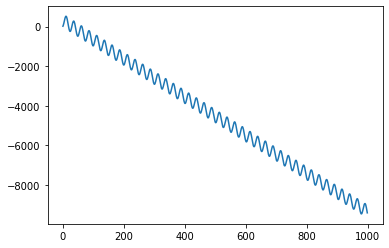

In [10]:
env = TradingEnv(test_input_source, test_to_predict,
                 winlen=winlen, bars_per_episode=bars_per_episode, traded_amt=traded_amt,
                 commission=commission, slippage=slippage
                 )
env = DummyVecEnv([lambda: env])

# visualize the behavior for one random episode
bars_per_episode = 1000

nstate = model.initial_state  # get the initial state vector for the reccurent network
#dones = np.zeros(nstate.shape[0])  # set all environment to not done
nstate=None

observation = env.envs[0].reset()#env.reset()
done = False
navs = []
acts = []
for i in tqdm(range(bars_per_episode)):
    action, nstate = model.predict([observation], state=nstate)
    acts.append(action)
    observation, reward, done, info = env.envs[0].step(action)#env.step(action)
    if done:
        break
    navs.append(env.get_attr('balance')[0])


kl = []
t = 0
for n in np.diff(np.vstack(navs).reshape(-1)):
    t = t + n
    kl.append(t)
plot(kl);

 13% (343 of 2500) |##                   | Elapsed Time: 0:01:44 ETA:   0:11:03

Profit likelihood: 59.184%


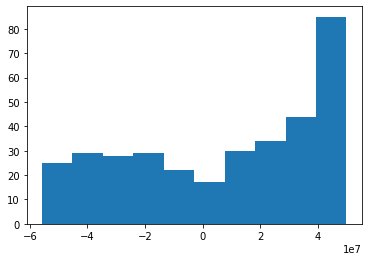

In [8]:
# calculate the likelihood of success for any given episode
try:
    l = 2500

    krl = []
    p = pb.ProgressBar(max_value=l)
    for i in range(l):
        p.update(i)
        observation = env.envs[0].reset()
        done = False
        navs = []
        for i in (range(bars_per_episode)):
            action, nstate = model.predict([observation], state=nstate)
            acts.append(action)
            observation, reward, done, info = env.envs[0].step(action)#env.step(action)
            navs.append(env.get_attr('balance')[0])
        krl.append(sum(navs))
    p.finish()
except KeyboardInterrupt:
    pass

krl = np.array(krl)
print('Profit likelihood: %3.3f%%' % (100*(sum(krl > 0) / len(krl))))

hist(krl);